
<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: rgb(254, 200, 85); font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color:  #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; margin-top: 20px; }
        h4 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: rgb(254, 200, 85); margin: 20px 0; }
    </style>
</head>
<body>

<h1>🏪 PROJET : "L'ARCHIPEL DES TERRASSES PARISIENNES"</h1>
<h2 style="text-align:center; color:rgb(254, 200, 85);">🔍 Analyse des clusters spontanés de terrasses commerciales à Paris</h2>
<hr>
<h4>🏪 1. Business Understanding</h4>
<h2>🏪  Introduction</h2>
<p><strong>📌 Objectif :</strong></p>
<p>Ce projet vise à identifier et analyser les clusters spontanés de terrasses et étalages commerciaux à Paris.  
Comprendre ces patterns d'agglomération naturelle aide les urbanistes, investisseurs et commerçants à prendre des décisions éclairées.</p>

<h2>🛠️ Objectifs Clés</h2>
<ul>
    <li>🔄 Cartographier les clusters de terrasses par typologie</li>
    <li>📈 Analyser les corrélations spatiales entre établissements</li>
    <li>🏘️ Étudier l'influence des arrondissements sur la spécialisation</li>
    <li>🗺️ Identifier les "îles commerciales" extérieures spontanées</li>
</ul>

<h2>🔑 Définitions</h2>
<ul>
    <li>🏷️ <strong>Cluster Commercial :</strong> Regroupement naturel de terrasses similaires ou complémentaires. Exemples : zones de restaurants, corridors de cafés, concentrations d'étalages</li>
    <li>📊 <strong>Indice de Spécialisation :</strong> Concentration d'un type de terrasse dans une zone vs moyenne parisienne. Formule : (Type X terrasses / total terrasses en zone) × 100</li>
    <li>🌐 <strong>Écosystème Commercial Extérieur :</strong> Terrasses interagissant dans un espace, créant des synergies et complémentarités</li>
</ul>

<h2>🎯 Valeur Métier</h2>
<ul>
    <li>🏛️ Ville de Paris : Support décisionnel pour les autorisations de terrasses</li>
    <li>💼 Investisseurs : Identifier les zones sous-utilisées et opportunités de niche</li>
    <li>🛍️ Commerçants : Comprendre les écosystèmes locaux pour un positionnement optimal</li>
    <li>🏢 Urbanistes : Analyser les flux économiques et la vitalité des quartiers</li>
</ul>

<h2>👥 Parties Prenantes</h2>
<ul>
    <li>🏛️ Ville de Paris – Urbanisme et Développement Économique</li>
    <li>💼 Investisseurs Immobiliers – Promoteurs, sociétés foncières</li>
    <li>🛍️ Futurs Commerçants / Franchises</li>
    <li>🏢 Chambre de Commerce – Support aux entreprises</li>
    <li>🎓 Chercheurs en Économie Urbaine</li>
</ul>

<h2>📊 Critères de Succès</h2>
<ul>
    <li>🔍 Identifier au moins 5 clusters significatifs de terrasses</li>
    <li>📈 Mettre en lumière des corrélations spatiales contre-intuitives</li>
    <li>🎯 Produire des insights actionnables pour l'implantation commerciale</li>
    <li>📱 Créer des visualisations claires et pédagogiques</li>
</ul>

<h2>🚧 Contraintes</h2>
<ul>
    <li>📅 Délai : 5 jours</li>
    <li>💾 Données disponibles : 23,616 terrasses et étalages autorisés</li>
    <li>🔍 Qualité des données : Catégorisation des types de terrasses à uniformiser</li>
    <li>🌍 Périmètre : Paris intra-muros uniquement (20 arrondissements)</li>
    <li>✅ MVP : focus sur l'analyse spatiale des implantations extérieures</li>
</ul>

<h2>📋 Livrables</h2>
<ul>
    <li>📊 Rapport d'analyse complet avec méthodologie et résultats</li>
    <li>🗺️ Carte interactive des clusters identifiés</li>
    <li>📈 Tableau de bord des métriques clés</li>
    <li>💾 Code source et documentation technique</li>
    <li>🎤 Présentation synthétique pour les parties prenantes</li>
</ul>

</body>
</html>


<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; margin-top: 20px; }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>

<h1>🏪 2. Data Understanding</h1>
<p><strong>📌 Objectif :</strong></p>
<p>La phase de compréhension des données vise à explorer et appréhender le jeu de données collecté. Cette étape permet de s'assurer que toutes les variables, leurs distributions et la qualité des données sont bien comprises avant de passer à l'analyse et à la modélisation.</p>

<h2>🛠️ Éléments Clés de Cette Phase</h2>
<ul>
    <li>🔍 Exploration du jeu de données : nombre de lignes, colonnes et types de variables</li>
    <li>🧹 Évaluation de la qualité des données : valeurs manquantes, incohérences, doublons</li>
    <li>📊 Statistiques descriptives : comptes, moyennes, étendues, distributions</li>
    <li>🌐 Analyse spatiale : examen des localisations, arrondissements, coordonnées</li>
    <li>🏷️ Analyse catégorielle : types de terrasses, classification par arrondissement, statut des autorisations</li>
    <li>📅 Analyse temporelle : dates des autorisations, saisonnalité, tendances dans le temps</li>
</ul>

<p>Cette phase permet de **poser les bases pour le nettoyage, la préparation et l’analyse des données** en fournissant une vision claire du contenu du jeu de données et de ses limites.</p>

</body>
</html>


<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3>Imports</h3>


In [5]:
# %% Cellule 2: Installation et Import des Bibliothèques
print("📚 CHARGEMENT DES BIBLIOTHÈQUES...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import MarkerCluster
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


print("✅ Bibliothèques chargées avec succès!")

📚 CHARGEMENT DES BIBLIOTHÈQUES...
✅ Bibliothèques chargées avec succès!


<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3>Data Loading</h3>


In [6]:

print("📂 CHARGEMENT DES DONNÉES...")

df_raw = pd.read_csv('../data/raw/terrasses_paris.csv')

print(f"✅ DONNÉES BRUTES CHARGÉES : {len(df_raw):,} terrasses")
print(f"📊 Dimensions : {df_raw.shape[0]} lignes x {df_raw.shape[1]} colonnes")


📂 CHARGEMENT DES DONNÉES...
✅ DONNÉES BRUTES CHARGÉES : 5,000 terrasses
📊 Dimensions : 5000 lignes x 12 colonnes


<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3>Exploration des colonnes brutes</h3>


In [7]:
print("\n👀 APERÇU DES DONNÉES BRUTES :")
display(df_raw.head(3))

print("\n📋 TOUTES LES COLONNES DISPONIBLES :")
for i, col in enumerate(df_raw.columns, 1):
    print(f"   {i:2d}. {col} - Type: {df_raw[col].dtype}")

print(f"\n🎯 COLONNES IMPORTANTES IDENTIFIÉES :")
important_cols = []
for col in df_raw.columns:
    if any(keyword in col.lower() for keyword in ['type', 'arrondissement', 'adresse', 'geo', 'nom', 'enseigne']):
        important_cols.append(col)
        print(f"   ✅ {col}")

for col in important_cols:
    print(f"\n📊 Aperçu de '{col}':")
    print(df_raw[col].head(5))


👀 APERÇU DES DONNÉES BRUTES :


,typologie,adresse,arrondissement,nom_enseigne,nom_societe,siret,longueur,largeur,periode_installation,lien_affichette,geo_shape,geo_point_2d
0,CONTRE-TERRASSE OUVERTE,14 RUE DES PANOYAUX,75020.0,LOU PASCALOU,NaN,5.238440e+13,4.80,4.0,NaN,https://eudonet-terrasses.apps.paris.fr/xrm/at...,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3854522524772896, 'lat': 48.86633009..."
1,TERRASSE OUVERTE,167 BOULEVARD VOLTAIRE,75011.0,NaN,NaN,5.128560e+13,7.65,2.0,NaN,https://eudonet-terrasses.apps.paris.fr/xrm/at...,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3857018993955266, 'lat': 48.85464237..."
2,TERRASSE OUVERTE,16 RUE DU LOUVRE,75001.0,CHEZ ALEXANDRE,NaN,4.222180e+13,2.50,1.1,NaN,https://eudonet-terrasses.apps.paris.fr/xrm/at...,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3410809317051617, 'lat': 48.86116698..."



📋 TOUTES LES COLONNES DISPONIBLES :
    1. typologie - Type: object
    2. adresse - Type: object
    3. arrondissement - Type: float64
    4. nom_enseigne - Type: object
    5. nom_societe - Type: object
    6. siret - Type: float64
    7. longueur - Type: float64
    8. largeur - Type: float64
    9. periode_installation - Type: object
   10. lien_affichette - Type: object
   11. geo_shape - Type: object
   12. geo_point_2d - Type: object

🎯 COLONNES IMPORTANTES IDENTIFIÉES :
   ✅ adresse
   ✅ arrondissement
   ✅ nom_enseigne
   ✅ nom_societe
   ✅ geo_shape
   ✅ geo_point_2d

📊 Aperçu de 'adresse':
0       14 RUE DES PANOYAUX
1    167 BOULEVARD VOLTAIRE
2          16 RUE DU LOUVRE
3       17 RUE LOUIS BONNET
4       65 RUE CAULAINCOURT
Name: adresse, dtype: object

📊 Aperçu de 'arrondissement':
0    75020.0
1    75011.0
2    75001.0
3    75011.0
4    75018.0
Name: arrondissement, dtype: float64

📊 Aperçu de 'nom_enseigne':
0              LOU PASCALOU
1                       NaN
2   

<span  style="color: rgb(254, 95, 87);  font-size:22px; font-weight:bold;;">📌 Interprétation : Compréhension des Données</span>

<ul>
    <li><strong>Vue d'ensemble des colonnes :</strong> Le jeu de données contient 12 colonnes, couvrant le type de commerce, la localisation, l'entité légale, les dimensions, la période d'installation et les informations géospatiales.</li>
    <li><strong>Colonnes clés sélectionnées :</strong> <code>adresse</code>, <code>arrondissement</code>, <code>nom_enseigne</code>, <code>nom_societe</code>, <code>geo_shape</code>, <code>geo_point_2d</code> — ces colonnes sont essentielles pour l'analyse spatiale et commerciale.</li>
    <li><strong>Principaux enseignements :</strong>
        <ul>
            <li><code>adresse</code> & <code>arrondissement</code> → permettent de localiser les commerces et d'analyser leur répartition spatiale.</li>
            <li><code>nom_enseigne</code> & <code>nom_societe</code> → permettent d'identifier la présence des marques et les patterns des sociétés.</li>
            <li><code>geo_shape</code> & <code>geo_point_2d</code> → permettent de cartographier les clusters et de mesurer la proximité entre les terrasses.</li>
        </ul>
    </li>
</ul>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3>Qualité des colonnes brutes</h3>


In [102]:
# Nombre de valeurs manquantes par colonne
missing_raw = df_raw.isnull().sum()

# Pourcentage de valeurs manquantes par colonne
missing_percent = missing_raw / len(df_raw) * 100

# Affichage console
print("\n🔍 ANALYSE DE LA QUALITÉ (BRUTES) :")
print("📊 VALEURS MANQUANTES PAR COLONNE :")
for col in df_raw.columns:
    if missing_raw[col] > 0:
        print(f"   ⚠️  {col:30} : {missing_raw[col]:6,} manquantes ({missing_percent[col]:5.1f}%)")

print(f"\n📈 STATISTIQUES DE QUALITÉ :")
print(f"   • Taux de complétude global : {(1 - missing_raw.sum() / (len(df_raw) * len(df_raw.columns))) * 100:.1f}%")
print(f"   • Colonnes sans données manquantes : {sum(missing_raw == 0)}/{len(df_raw.columns)}")
print(f"   • Colonnes avec +20% de données manquantes : {sum(missing_percent > 20)}")

# Graphique des valeurs manquantes
import plotly.express as px

fig = px.bar(
    x=missing_percent.index,
    y=missing_percent,
    title='📊 POURCENTAGE DE VALEURS MANQUANTES PAR COLONNE',
    labels={'x': 'Colonnes', 'y': '% Valeurs Manquantes'},
    color=missing_percent,
    color_continuous_scale='reds'
)

fig.update_layout(xaxis_tickangle=-45, showlegend=False)
fig.show()



🔍 ANALYSE DE LA QUALITÉ (BRUTES) :
📊 VALEURS MANQUANTES PAR COLONNE :
   ⚠️  typologie                      :      2 manquantes (  0.0%)
   ⚠️  adresse                        :      2 manquantes (  0.0%)
   ⚠️  arrondissement                 :    150 manquantes (  3.0%)
   ⚠️  nom_enseigne                   :    155 manquantes (  3.1%)
   ⚠️  nom_societe                    :  4,847 manquantes ( 96.9%)
   ⚠️  siret                          :    175 manquantes (  3.5%)
   ⚠️  longueur                       :     16 manquantes (  0.3%)
   ⚠️  largeur                        :     24 manquantes (  0.5%)
   ⚠️  periode_installation           :  4,848 manquantes ( 97.0%)
   ⚠️  lien_affichette                :    923 manquantes ( 18.5%)

📈 STATISTIQUES DE QUALITÉ :
   • Taux de complétude global : 81.4%
   • Colonnes sans données manquantes : 2/12
   • Colonnes avec +20% de données manquantes : 2


<span style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">🔍 Interprétation : Qualité des Données</span>

- **Aperçu des valeurs manquantes :**  
  - La plupart des colonnes contiennent très peu de valeurs manquantes (**typologie**, **adresse**, **arrondissement**, **nom_enseigne**, **siret**, **longueur**, **largeur**).  
  - Les colonnes **nom_societe** et **periode_installation** présentent des taux de valeurs manquantes très élevés (~97%), ce qui indique qu’elles ne sont pas fiables pour l’analyse.  
  - La colonne **lien_affichette** contient 18,5% de valeurs manquantes — utilisation possible de manière sélective.  

- **Métriques globales de qualité :**  
  - Taux de complétude global : **81,4%**  
  - Seules **2 colonnes** sont totalement complètes.  
  - **2 colonnes** ont plus de 20% de valeurs manquantes, ce qui nécessite prudence ou exclusion potentielle.



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3>Analyse des données géographiques brutes</h3>


In [9]:
print("\n🗺️  ANALYSE DES DONNÉES GÉOGRAPHIQUES :")

geo_cols = [col for col in df_raw.columns if any(keyword in col.lower() for keyword in ['geo', 'lat', 'lon', 'coord'])]
print(f"📍 Colonnes géographiques trouvées : {geo_cols}")

for geo_col in geo_cols:
    print(f"\n📊 Analyse de '{geo_col}':")
    print(f"   • Type : {df_raw[geo_col].dtype}")
    print(f"   • Valeurs uniques : {df_raw[geo_col].nunique()}")
    print(f"   • Exemples : {df_raw[geo_col].dropna().head(3).tolist()}")
    
    sample_val = df_raw[geo_col].dropna().iloc[0] if not df_raw[geo_col].dropna().empty else "N/A"
    if isinstance(sample_val, str) and ',' in sample_val:
        print(f"   • Format : Coordonnées combinées (lat,lon)")
    else:
        print(f"   • Format : Simple")






🗺️  ANALYSE DES DONNÉES GÉOGRAPHIQUES :
📍 Colonnes géographiques trouvées : ['longueur', 'periode_installation', 'geo_shape', 'geo_point_2d']

📊 Analyse de 'longueur':
   • Type : float64
   • Valeurs uniques : 712
   • Exemples : [4.8, 7.65, 2.5]
   • Format : Simple

📊 Analyse de 'periode_installation':
   • Type : object
   • Valeurs uniques : 1
   • Exemples : ["Toute l'année", "Toute l'année", "Toute l'année"]
   • Format : Simple

📊 Analyse de 'geo_shape':
   • Type : object
   • Valeurs uniques : 4988
   • Exemples : ["{'type': 'Feature', 'geometry': {'coordinates': [2.3854522524772896, 48.866330091701045], 'type': 'Point'}, 'properties': {}}", "{'type': 'Feature', 'geometry': {'coordinates': [2.3857018993955266, 48.854642373630554], 'type': 'Point'}, 'properties': {}}", "{'type': 'Feature', 'geometry': {'coordinates': [2.3410809317051617, 48.86116698012297], 'type': 'Point'}, 'properties': {}}"]
   • Format : Coordonnées combinées (lat,lon)

📊 Analyse de 'geo_point_2d':
   • T

<span style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">🌍 Interprétation : Données Géographiques</span>

- **Colonnes identifiées :** `longueur`, `periode_installation`, `geo_shape`, `geo_point_2d`

- **`longueur` :**  
  - Numérique et simple, avec **712 valeurs uniques**.  
  - Peut être utilisée pour analyser les longueurs des terrasses et leur répartition spatiale.

- **`periode_installation` :**  
  - Valeur unique répétée ("Toute l'année"), donc **pas de variabilité**.  
  - Peu utile pour l’analyse des patterns saisonniers.

- **`geo_shape` :**  
  - Contient **4988 coordonnées uniques** dans un format d’objet complexe.  
  - Représente les localisations précises des terrasses, utile pour cartographie et clustering spatial.

- **`geo_point_2d` :**  
  - Aussi **4988 coordonnées uniques**, mais en format simplifié latitude/longitude.  
  - Plus facile à utiliser pour la visualisation, calculs géospatiaux et analyse de clusters.



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3>Analyse des types et catégories brutes</h3>


In [10]:
print("\n🏷️  ANALYSE DES CATÉGORIES ET TYPES :")

type_cols = [col for col in df_raw.columns if any(keyword in col.lower() for keyword in ['type', 'typologie', 'categorie', 'catégorie'])]
print(f"🎪 Colonnes de type trouvées : {type_cols}")

for type_col in type_cols:
    print(f"\n📊 Analyse de '{type_col}':")
    type_stats = df_raw[type_col].value_counts()
    print(f"   • Valeurs uniques : {type_stats.nunique()}")
    print(f"   • Top 5 valeurs :")
    for i, (val, count) in enumerate(type_stats.head().items(), 1):
        print(f"      {i}. {val} : {count:,}")


🏷️  ANALYSE DES CATÉGORIES ET TYPES :
🎪 Colonnes de type trouvées : ['typologie']

📊 Analyse de 'typologie':
   • Valeurs uniques : 24
   • Top 5 valeurs :
      1. TERRASSE OUVERTE : 1,892
      2. ETALAGE : 985
      3. CONTRE TERRASSE ESTIVALE SUR STATIONNEMENT : 464
      4. TERRASSE FERMÉE : 408
      5. TERRASSES OUVERTES SUR TROTTOIR : 346


<span style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">🏷️ Interprétation : Catégories & Typologies</span>

- **Colonne analysée :** `typologie`  
- **Valeurs uniques :** 24  
- **Types les plus fréquents :**  
  1. **TERRASSE OUVERTE** – 1,892 occurrences  
  2. **ETALAGE** – 985 occurrences  
  3. **CONTRE TERRASSE ESTIVALE SUR STATIONNEMENT** – 464 occurrences  
  4. **TERRASSE FERMÉE** – 408 occurrences  
  5. **TERRASSES OUVERTES SUR TROTTOIR** – 346 occurrences  

- **Insights :**  
  - Les **terrasses ouvertes** ("TERRASSE OUVERTE") dominent l’échantillon, révélant une forte présence commerciale extérieure.  
  - Les **étalages / displays** sont également fréquents, soulignant l’activité commerciale sur les trottoirs.  
  - Certains types de terrasses sont plus spécialisés (ex : "CONTRE TERRASSE ESTIVALE"), ce qui peut être pertinent pour le **clustering spatial**.



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3>Analyse des arronsissements brutes</h3>


In [11]:
# Cellule 4: ANALYSE INTERACTIVE DES ARRONDISSEMENTS
print("🏙️ ANALYSE INTERACTIVE DES ARRONDISSEMENTS :")

# Recherche de la colonne d'arrondissement
arr_cols = [col for col in df_raw.columns if any(keyword in col.lower() for keyword in ['arrondissement', 'arrdt', 'arr'])]

if arr_cols:
    arr_col = arr_cols[0]  # Prendre la première colonne trouvée
    print(f"📍 Utilisation de la colonne : {arr_col}")
    
    arr_stats = df_raw[arr_col].value_counts().reset_index()
    arr_stats.columns = ['Arrondissement', 'Nombre_Terrasses']
    
    # Graphique en barres interactif
    fig = px.bar(arr_stats, x='Arrondissement', y='Nombre_Terrasses',
                 title='🏙️ NOMBRE DE TERRASSES PAR ARRONDISSEMENT',
                 color='Nombre_Terrasses',
                 color_continuous_scale='viridis')
    
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()
    
    # Camembert pour la répartition
    fig_pie = px.pie(arr_stats.head(10), names='Arrondissement', values='Nombre_Terrasses',
                     title='🎪 TOP 10 DES ARRONDISSEMENTS (RÉPARTITION)')
    fig_pie.show()
    
    print(f"📊 STATISTIQUES :")
    print(f"   • {arr_stats['Arrondissement'].nunique()} arrondissements différents")
    print(f"   • Moyenne : {arr_stats['Nombre_Terrasses'].mean():.0f} terrasses/arrondissement")
    print(f"   • Max : {arr_stats['Nombre_Terrasses'].max()} terrasses")
    
else:
    print("❌ Aucune colonne d'arrondissement trouvée")

🏙️ ANALYSE INTERACTIVE DES ARRONDISSEMENTS :
📍 Utilisation de la colonne : arrondissement


📊 STATISTIQUES :
   • 21 arrondissements différents
   • Moyenne : 231 terrasses/arrondissement
   • Max : 341 terrasses


<span style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">🏙️ Interprétation : Analyse par Arrondissements</span>

- **Colonne analysée :** `arrondissement`  
- **Nombre de districts :** 21  
- **Nombre moyen de terrasses par district :** 231  
- **Maximum de terrasses dans un district :** 341  

- **Insights :**  
  - Les terrasses sont **inégalement réparties** à Paris, certains arrondissements concentrant beaucoup plus d’installations.  
  - Les **10 arrondissements les plus actifs** regroupent la majorité des terrasses, indiquant des **zones commerciales clés**.  
  - Cette distribution peut guider la **planification urbaine ciblée** et les **stratégies d’implantation commerciale**.


<!DOCTYPE html>
<html>
<head>
    <style>
        body { 
            font-family: Arial, sans-serif; 
            margin: 40px; 
            background: #f5f5f5; 
            color: #333; 
            line-height: 1.6; 
        }
        h1 { 
            text-align: center; 
            color: lightgreen; 
            font-size: 36px; 
            font-weight: bold; 
            margin-bottom: 10px; 
        }
        h2 { 
            color: #EF806C; 
            font-size: 28px; 
            font-weight: bold; 
            margin-top: 30px; 
        }
        h3 { 
            color: #00FFFF; 
            font-size: 22px; 
            margin-top: 20px; 
        }
        ul { 
            margin-left: 20px; 
        }
        li { 
            margin: 8px 0; 
        }
        hr { 
            height: 2px; 
            border: none; 
            background-color: lightgreen; 
            margin: 20px 0; 
        }
    </style>
</head>
<body>

<h1>🧹 3. Préparation des Données</h1>
<p><strong>📌 Objectif :</strong></p>
<p>La phase de préparation des données consiste à transformer les données brutes en un format propre et structuré, prêt pour l’analyse. Cette étape garantit que le jeu de données est cohérent, complet et adapté à la visualisation ou au modélisation.</p>

<h2>🛠️ Éléments Clés de Cette Phase</h2>
<ul>
    <li>🧩 Gestion des valeurs manquantes : compléter, imputer ou supprimer les enregistrements incomplets</li>
    <li>🧽 Nettoyage des données : corriger les erreurs, standardiser les textes, supprimer les doublons</li>
    <li>🔢 Transformation des données : conversion de types, normalisation des champs numériques</li>
    <li>🏷️ Sélection des variables : conserver les variables pertinentes pour l’analyse</li>
    <li>🗺️ Formatage des données spatiales : assurer la cohérence des coordonnées (latitude/longitude)</li>
    <li>🧮 Création de variables dérivées : extraire des informations à partir des variables existantes</li>
</ul>

<p>Cette étape fait le lien entre l’exploration des données brutes et l’analyse avancée, en garantissant que les données sont **fiables, exploitables et alignées sur les objectifs du projet**.</p>

</body>
</html>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3>Création de la copie de sécurité</h3>


In [12]:

print("🔧 ÉTAPE 1: CRÉATION DE LA COPIE DE SÉCURITÉ")

df_clean = df_raw.copy()


print(f"\n📊 AVANT NETTOYAGE : {len(df_clean):,} enregistrements")
print(f"📋 Colonnes disponibles : {len(df_clean.columns)}")

🔧 ÉTAPE 1: CRÉATION DE LA COPIE DE SÉCURITÉ

📊 AVANT NETTOYAGE : 5,000 enregistrements
📋 Colonnes disponibles : 12


<h2 style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">🎯 Conclusion</h2>
<ul>
    <li>💾 <strong>Conserver les données brutes :</strong> Garder le jeu de données original garantit l’intégrité des informations et permet une référence ou vérification future.</li>
    <li>🧩 <strong>Travailler sur une copie :</strong> Effectuer le nettoyage et les transformations sur un duplicata évite toute perte ou corruption accidentelle des données.</li>
    <li>⚖️ <strong>Permettre une comparaison avant/après :</strong> Conserver les deux versions (brute et préparée) permet de valider les améliorations de qualité des données et d’assurer la reproductibilité des résultats.</li>
</ul>

<p>➡️ En résumé, cette étape permet de construire un jeu de données fiable et structuré — la base pour une analyse précise et des insights pertinents dans la phase suivante.</p>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> Extraction des coordonnées GPS</h3>


In [13]:

print("📍 ÉTAPE 2: EXTRACTION DES COORDONNÉES GPS")

def extract_coordinates(geo_str):
    """
    Extrait latitude et longitude de la chaîne JSON geo_point_2d
    """
    try:
        if pd.isna(geo_str):
            return np.nan, np.nan
        
        # Convertir la string JSON en dictionnaire Python
        import ast
        geo_dict = ast.literal_eval(geo_str)
        
        # Extraire lat et lon
        lat = geo_dict.get('lat', np.nan)
        lon = geo_dict.get('lon', np.nan)
        
        return lat, lon
        
    except Exception as e:
        print(f"⚠️  Erreur d'extraction : {e}")
        return np.nan, np.nan

# Appliquer l'extraction à toutes les lignes
print("🔄 Extraction en cours...")
coordinates_data = df_clean['geo_point_2d'].apply(
    lambda x: pd.Series(extract_coordinates(x)) if pd.notna(x) else pd.Series([np.nan, np.nan])
)

# Ajouter les nouvelles colonnes
df_clean[['latitude', 'longitude']] = coordinates_data

print(f"\n✅ RÉSULTATS :")
print(f"   • Points géolocalisés extraits : {df_clean[['latitude', 'longitude']].notna().all(axis=1).sum():,}")
print(f"   • Latitude min/max : {df_clean['latitude'].min():.3f} / {df_clean['latitude'].max():.3f}")
print(f"   • Longitude min/max : {df_clean['longitude'].min():.3f} / {df_clean['longitude'].max():.3f}")

# Aperçu des coordonnées extraites
print("\n👀 APERÇU DES COORDONNÉES EXTRAITES :")
display(df_clean[['geo_point_2d', 'latitude', 'longitude']].head(3))

📍 ÉTAPE 2: EXTRACTION DES COORDONNÉES GPS
🔄 Extraction en cours...

✅ RÉSULTATS :
   • Points géolocalisés extraits : 5,000
   • Latitude min/max : 48.819 / 48.899
   • Longitude min/max : 2.255 / 2.411

👀 APERÇU DES COORDONNÉES EXTRAITES :


,geo_point_2d,latitude,longitude
0,"{'lon': 2.3854522524772896, 'lat': 48.86633009...",48.866330,2.385452
1,"{'lon': 2.3857018993955266, 'lat': 48.85464237...",48.854642,2.385702
2,"{'lon': 2.3410809317051617, 'lat': 48.86116698...",48.861167,2.341081


<h2 style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">📍 Conclusion</h2>


<ul>
    <li>🗺️ <strong>Format JSON à décoder :</strong> Les coordonnées géographiques sont stockées dans un champ JSON (<code>geo_point_2d</code>), nécessitant une extraction manuelle.</li>
    <li>📍 <strong>Séparation des valeurs :</strong> Il est essentiel de dissocier la <strong>latitude</strong> et la <strong>longitude</strong> en deux colonnes distinctes pour l'analyse géospatiale.</li>
    <li>🤖 <strong>Préparation pour le clustering :</strong> L’algorithme <code>DBSCAN</code> requiert des variables numériques indépendantes afin d’identifier les regroupements spatiaux (clusters).</li>
</ul>

<p>✅ Cette étape garantit la bonne préparation des données géographiques avant toute modélisation spatiale et permet d’obtenir des résultats de clustering précis et exploitables.</p>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> Nettoyage des arrondissements</h3>


In [14]:

print("🏙️ ÉTAPE 3: NETTOYAGE DES ARRONDISSEMENTS")

# Conversion et nettoyage
print("🔄 Conversion des arrondissements...")

# Sauvegarde du type original
original_dtype = df_clean['arrondissement'].dtype
original_nunique = df_clean['arrondissement'].nunique()

# Conversion en string et nettoyage
df_clean['arrondissement'] = df_clean['arrondissement'].astype(str)
df_clean['arrondissement'] = df_clean['arrondissement'].str.replace('.0', '', regex=False)
df_clean['arrondissement'] = df_clean['arrondissement'].replace('nan', np.nan)

print(f"\n✅ RÉSULTATS :")
print(f"   • Type avant : {original_dtype}")
print(f"   • Type après : {df_clean['arrondissement'].dtype}")
print(f"   • Arrondissements uniques : {original_nunique} → {df_clean['arrondissement'].nunique()}")
print(f"   • Format standardisé : '75020' au lieu de '75020.0'")

# Distribution des arrondissements
print("\n📊 DISTRIBUTION DES ARRONDISSEMENTS (après nettoyage) :")
arrondissement_stats = df_clean['arrondissement'].value_counts().head(10)
for i, (arr, count) in enumerate(arrondissement_stats.items(), 1):
    print(f"   {i:2d}. {arr} : {count:,} terrasses")

🏙️ ÉTAPE 3: NETTOYAGE DES ARRONDISSEMENTS
🔄 Conversion des arrondissements...

✅ RÉSULTATS :
   • Type avant : float64
   • Type après : object
   • Arrondissements uniques : 21 → 21
   • Format standardisé : '75020' au lieu de '75020.0'

📊 DISTRIBUTION DES ARRONDISSEMENTS (après nettoyage) :
    1. 75018 : 341 terrasses
    2. 75015 : 335 terrasses
    3. 75011 : 333 terrasses
    4. 75010 : 322 terrasses
    5. 75017 : 299 terrasses
    6. 75014 : 290 terrasses
    7. 75005 : 289 terrasses
    8. 75012 : 275 terrasses
    9. 75008 : 260 terrasses
   10. 75009 : 251 terrasses


<h2 style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">🏙️ Conclusion</h2>


<ul>
    <li>🔢 <strong>Problème de type :</strong> Les valeurs des arrondissements sont enregistrées au format <code>float</code> (ex. 75020.0), ce qui n’est pas adapté à une analyse catégorielle.</li>
    <li>🔤 <strong>Conversion nécessaire :</strong> Transformation en <code>string</code> pour permettre les regroupements, tris et visualisations correctes.</li>
    <li>🧩 <strong>Uniformisation du format :</strong> Assure la cohérence entre les observations et facilite les comparaisons inter-arrondissements.</li>
</ul>

<p>✅ Cette étape simplifie l’analyse statistique et visuelle, garantissant une catégorisation claire des arrondissements lors des analyses ultérieures.</p>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> Standardisation des typologies </h3>


In [15]:

print("🏷️ ÉTAPE 4: STANDARDISATION DES TYPOLOGIES")

# Sauvegarde des stats avant nettoyage
original_typologies = df_clean['typologie'].nunique()
original_sample = df_clean['typologie'].head(5).tolist()

print("🔄 Standardisation en cours...")

# Nettoyage des typologies
df_clean['typologie'] = df_clean['typologie'].str.strip().str.upper()
df_clean['typologie'] = df_clean['typologie'].replace('NAN', np.nan)

print(f"\n✅ RÉSULTATS :")
print(f"   • Types uniques avant : {original_typologies}")
print(f"   • Types uniques après : {df_clean['typologie'].nunique()}")
print(f"   • Exemple avant : {original_sample}")
print(f"   • Exemple après : {df_clean['typologie'].head(5).tolist()}")

# Top des typologies après nettoyage
print("\n📊 TOP 10 DES TYPOLOGIES (standardisées) :")
typologie_stats = df_clean['typologie'].value_counts().head(10)
for i, (typo, count) in enumerate(typologie_stats.items(), 1):
    print(f"   {i:2d}. {typo} : {count:,}")

🏷️ ÉTAPE 4: STANDARDISATION DES TYPOLOGIES
🔄 Standardisation en cours...

✅ RÉSULTATS :
   • Types uniques avant : 32
   • Types uniques après : 32
   • Exemple avant : ['CONTRE-TERRASSE OUVERTE', 'TERRASSE OUVERTE', 'TERRASSE OUVERTE', 'ETALAGE', 'TERRASSE OUVERTE']
   • Exemple après : ['CONTRE-TERRASSE OUVERTE', 'TERRASSE OUVERTE', 'TERRASSE OUVERTE', 'ETALAGE', 'TERRASSE OUVERTE']

📊 TOP 10 DES TYPOLOGIES (standardisées) :
    1. TERRASSE OUVERTE : 1,892
    2. ETALAGE : 985
    3. CONTRE TERRASSE ESTIVALE SUR STATIONNEMENT : 464
    4. TERRASSE FERMÉE : 408
    5. TERRASSES OUVERTES SUR TROTTOIR : 346
    6. TERRASSE ESTIVALE SUR TROTTOIR FACE À LA DEVANTURE : 225
    7. CONTRE TERRASSE ESTIVALE SUR TROTTOIR FACE À LA DEVANTURE : 159
    8. CONTRE-TERRASSE PERMANENTE SUR STATIONNEMENT : 59
    9. ÉTALAGE SUR TROTTOIR : 59
   10. COMMERCE ACCESSOIRE : 57


<h2 style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">🧹 Conclusion</h2>

<ul>
    <li>🔠 <strong>Uniformiser la casse :</strong> Convertir toutes les valeurs en minuscules (ou majuscules) afin d’éviter les doublons dus aux variations de casse.</li>
    <li>✂️ <strong>Supprimer les espaces superflus :</strong> Éliminer les espaces en début ou fin de chaîne pour garantir la cohérence des données textuelles.</li>
    <li>🏷️ <strong>Préparer les catégories :</strong> Faciliter les regroupements, tris et visualisations lors des futures analyses catégorielles.</li>
</ul>

<p>✅ Cette étape améliore la qualité des données textuelles et garantit des regroupements fiables lors de l’analyse exploratoire.</p>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> Filtrage des données complètes </h3>


In [16]:

print("🎯 ÉTAPE 5: FILTRAGE DES DONNÉES COMPLÈTES")

initial_count = len(df_clean)
print(f"📊 Avant filtrage : {initial_count:,} enregistrements")

# Colonnes critiques pour l'analyse
critical_columns = ['latitude', 'longitude', 'typologie']

print(f"\n🔍 VÉRIFICATION DES DONNÉES MANQUANTES :")
for col in critical_columns:
    missing = df_clean[col].isna().sum()
    print(f"   • {col:15} : {missing:5,} manquantes ({missing/initial_count*100:5.1f}%)")

# Filtrage
print("\n🔄 Filtrage en cours...")
df_clean = df_clean.dropna(subset=critical_columns)
final_count = len(df_clean)

print(f"\n✅ RÉSULTATS :")
print(f"   • Enregistrements conservés : {final_count:,}")
print(f"   • Taux de conservation : {final_count/initial_count*100:.1f}%")
print(f"   • Données éliminées : {initial_count - final_count:,}")

🎯 ÉTAPE 5: FILTRAGE DES DONNÉES COMPLÈTES
📊 Avant filtrage : 5,000 enregistrements

🔍 VÉRIFICATION DES DONNÉES MANQUANTES :
   • latitude        :     0 manquantes (  0.0%)
   • longitude       :     0 manquantes (  0.0%)
   • typologie       :     2 manquantes (  0.0%)

🔄 Filtrage en cours...

✅ RÉSULTATS :
   • Enregistrements conservés : 4,998
   • Taux de conservation : 100.0%
   • Données éliminées : 2


<h2 style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">🧹 Conclusion</h2>

<ul>
    <li>🔠 <strong>Uniformiser la casse :</strong> Convertir toutes les valeurs en minuscules (ou majuscules) afin d’éviter les doublons dus aux variations de casse.</li>
    <li>✂️ <strong>Supprimer les espaces superflus :</strong> Éliminer les espaces en début ou fin de chaîne pour garantir la cohérence des données textuelles.</li>
    <li>🏷️ <strong>Préparer les catégories :</strong> Faciliter les regroupements, tris et visualisations lors des futures analyses catégorielles.</li>
</ul>

<p>✅ Cette étape améliore la qualité des données textuelles et garantit des regroupements fiables lors de l’analyse exploratoire.</p>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> Validation des donées geographique  </h3>


In [17]:

print("🗺️ ÉTAPE 6: VALIDATION GÉOGRAPHIQUE")


# Bornes géographiques de Paris intra-muros
paris_bounds = {
    'lat_min': 48.81, 'lat_max': 48.91,   # Latitude Nord/Sud
    'lon_min': 2.25, 'lon_max': 2.41      # Longitude Est/Ouest
}

print(f"📍 BORNES DE PARIS INTRA-MUROS :")
print(f"   • Latitude  : {paris_bounds['lat_min']:.3f} → {paris_bounds['lat_max']:.3f}")
print(f"   • Longitude : {paris_bounds['lon_min']:.3f} → {paris_bounds['lon_max']:.3f}")

initial_geo_count = len(df_clean)

# Application du filtre géographique
mask_paris = (
    (df_clean['latitude'] >= paris_bounds['lat_min']) & 
    (df_clean['latitude'] <= paris_bounds['lat_max']) &
    (df_clean['longitude'] >= paris_bounds['lon_min']) & 
    (df_clean['longitude'] <= paris_bounds['lon_max'])
)

df_clean = df_clean[mask_paris]
final_geo_count = len(df_clean)

print(f"\n✅ RÉSULTATS :")
print(f"   • Points avant validation : {initial_geo_count:,}")
print(f"   • Points après validation : {final_geo_count:,}")
print(f"   • Points éliminés (hors Paris) : {initial_geo_count - final_geo_count:,}")

# Vérification des coordonnées
print(f"\n🌍 COORDONNÉES FINALES :")
print(f"   • Latitude min/max  : {df_clean['latitude'].min():.3f} / {df_clean['latitude'].max():.3f}")
print(f"   • Longitude min/max : {df_clean['longitude'].min():.3f} / {df_clean['longitude'].max():.3f}")

🗺️ ÉTAPE 6: VALIDATION GÉOGRAPHIQUE
📍 BORNES DE PARIS INTRA-MUROS :
   • Latitude  : 48.810 → 48.910
   • Longitude : 2.250 → 2.410

✅ RÉSULTATS :
   • Points avant validation : 4,998
   • Points après validation : 4,988
   • Points éliminés (hors Paris) : 10

🌍 COORDONNÉES FINALES :
   • Latitude min/max  : 48.819 / 48.899
   • Longitude min/max : 2.255 / 2.410


<h2 style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">🗺️ Conclusion</h2>

<ul>
    <li>📍 <strong>Vérifier la localisation :</strong> S’assurer que toutes les coordonnées GPS appartiennent bien au territoire parisien (intra-muros).</li>
    <li>🚫 <strong>Éliminer les anomalies géographiques :</strong> Supprimer les points erronés, situés en dehors de Paris ou mal enregistrés.</li>
    <li>🧭 <strong>Garantir la cohérence spatiale :</strong> Préparer un jeu de données géographiquement homogène et fiable pour l’analyse des clusters.</li>
</ul>

<p>✅ Ce filtrage renforce la précision des résultats et évite les biais lors du calcul des regroupements commerciaux ou des visualisations cartographiques.</p>


In [103]:

print("💾 ÉTAPE 7: SAUVEGARDE ET RÉSUMÉ FINAL")

# Résumé complet du nettoyage
print("\n" + "="*70)
print("🎉 RÉSUMÉ COMPLET DU NETTOYAGE - PHASE 3 TERMINÉE !")
print("="*70)

cleaning_summary = {
    "Enregistrements bruts initiaux": len(df_raw),
    "Enregistrements après nettoyage": len(df_clean),
    "Taux de conservation global": f"{(len(df_clean)/len(df_raw)*100):.1f}%",
    "Points géolocalisés valides": df_clean[['latitude', 'longitude']].notna().all(axis=1).sum(),
    "Arrondissements couverts": df_clean['arrondissement'].nunique(),
    "Types de terrasses": df_clean['typologie'].nunique(),
    "Données dans Paris intra-muros": "100%"
}

print("\n📊 STATISTIQUES FINALES :")
for key, value in cleaning_summary.items():
    if isinstance(value, str):
        print(f"   • {key:35} : {value}")
    else:
        print(f"   • {key:35} : {value:,}")

# Sauvegarde des données nettoyées
print("\n💾 SAUVEGARDE DES DONNÉES NETTOYÉES...")
df_clean.to_csv('../data/processed/terrasses_paris_nettoyees.csv', index=False, encoding='utf-8')
print("✅ Données sauvegardées : 'data/processed/terrasses_paris_nettoyees.csv'")

print("\n👀 APERÇU FINAL DES DONNÉES NETTOYÉES :")
display(df_clean[['typologie', 'arrondissement', 'latitude', 'longitude', 'adresse']].head(5))



💾 ÉTAPE 7: SAUVEGARDE ET RÉSUMÉ FINAL

🎉 RÉSUMÉ COMPLET DU NETTOYAGE - PHASE 3 TERMINÉE !

📊 STATISTIQUES FINALES :
   • Enregistrements bruts initiaux      : 5,000
   • Enregistrements après nettoyage     : 4,988
   • Taux de conservation global         : 99.8%
   • Points géolocalisés valides         : 4,988
   • Arrondissements couverts            : 21
   • Types de terrasses                  : 32
   • Données dans Paris intra-muros      : 100%

💾 SAUVEGARDE DES DONNÉES NETTOYÉES...
✅ Données sauvegardées : 'data/processed/terrasses_paris_nettoyees.csv'

👀 APERÇU FINAL DES DONNÉES NETTOYÉES :


,typologie,arrondissement,latitude,longitude,adresse
0,CONTRE-TERRASSE OUVERTE,75020,48.866330,2.385452,14 RUE DES PANOYAUX
1,TERRASSE OUVERTE,75011,48.854642,2.385702,167 BOULEVARD VOLTAIRE
2,TERRASSE OUVERTE,75001,48.861167,2.341081,16 RUE DU LOUVRE
3,ETALAGE,75011,48.871256,2.376613,17 RUE LOUIS BONNET
4,TERRASSE OUVERTE,75018,48.889594,2.335879,65 RUE CAULAINCOURT


<h2 style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">💾 Conclusion  </h2>

<ul>
    <li>💽 <strong>Vérification des données nettoyées :</strong> Confirmer que toutes les étapes de nettoyage et de filtrage ont été correctement appliquées.</li>
    <li>🧩 <strong>Préservation des informations clés :</strong> Maintenir l’intégrité des variables essentielles : géolocalisation, typologies, arrondissements, etc.</li>
    <li>📂 <strong>Archivage :</strong> Sauvegarder les données nettoyées dans un fichier dédié pour analyses ultérieures et reproductibilité.</li>
</ul>

<p>✅ Cette étape clôture la phase de préparation en garantissant un jeu de données complet, cohérent et exploitable, prêt pour la visualisation et le clustering.</p>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> Verification des types de données </h3>


In [19]:

print("🔍 TEST 1: VÉRIFICATION DES TYPES DE DONNÉES")


data_types_check = {
    'latitude': 'float64',
    'longitude': 'float64', 
    'typologie': 'object',
    'arrondissement': 'object'
}

print("\n📊 TYPES ACTUELS DES COLONNES CLÉS :")
for col, expected_type in data_types_check.items():
    actual_type = df_clean[col].dtype
    status = "✅" if str(actual_type) == expected_type else "❌"
    print(f"   {status} {col:15} : {actual_type} (attendu: {expected_type})")

# Vérification supplémentaire pour les coordonnées
print(f"\n📍 VÉRIFICATION NUMÉRIQUE DES COORDONNÉES :")
print(f"   • Latitude  : Min {df_clean['latitude'].min():.6f}, Max {df_clean['latitude'].max():.6f}")
print(f"   • Longitude : Min {df_clean['longitude'].min():.6f}, Max {df_clean['longitude'].max():.6f}")
print(f"   • Valeurs NaN : Lat {df_clean['latitude'].isna().sum()}, Lon {df_clean['longitude'].isna().sum()}")

🔍 TEST 1: VÉRIFICATION DES TYPES DE DONNÉES

📊 TYPES ACTUELS DES COLONNES CLÉS :
   ✅ latitude        : float64 (attendu: float64)
   ✅ longitude       : float64 (attendu: float64)
   ✅ typologie       : object (attendu: object)
   ✅ arrondissement  : object (attendu: object)

📍 VÉRIFICATION NUMÉRIQUE DES COORDONNÉES :
   • Latitude  : Min 48.819138, Max 48.898886
   • Longitude : Min 2.255028, Max 2.409811
   • Valeurs NaN : Lat 0, Lon 0


<h2 style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">🧪 Test 1 : Vérification des Types de Données</h2>

<p>S’assurer que chaque colonne possède le bon type de données afin de garantir la fiabilité des traitements et analyses ultérieures.</p>

<h3>📊 Points de Contrôle</h3>
<ul>
    <li>✅ <strong>Latitude</strong> → Doit être de type <code>float64</code></li>
    <li>✅ <strong>Longitude</strong> → Doit être de type <code>float64</code></li>
    <li>✅ <strong>Typologie</strong> → Doit être de type <code>object</code></li>
    <li>✅ <strong>Arrondissement</strong> → Doit être de type <code>object</code></li>
</ul>

<h3>📍 Vérification Numérique des Coordonnées</h3>
<ul>
    <li>📈 <strong>Latitude :</strong> bornes min/max conformes à la zone parisienne (≈ 48.80 à 48.90)</li>
    <li>📉 <strong>Longitude :</strong> bornes min/max conformes (≈ 2.25 à 2.42)</li>
    <li>⚙️ <strong>Valeurs manquantes :</strong> Absence ou faible nombre de NaN validée</li>
</ul>

<p>✅ Cette étape confirme la conformité structurelle et numérique du jeu de données avant le passage aux étapes de clustering et de cartographie.</p>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> Verification des valeurs manquantes  </h3>


In [20]:

print("🔍 TEST 2: VÉRIFICATION DES VALEURS MANQUANTES")


critical_columns = ['latitude', 'longitude', 'typologie', 'arrondissement']

print("\n📊 VALEURS MANQUANTES PAR COLONNE CRITIQUE :")
missing_summary = []
all_critical_ok = True

for col in critical_columns:
    missing_count = df_clean[col].isna().sum()
    missing_percent = (missing_count / len(df_clean)) * 100
    status = "✅" if missing_count == 0 else "❌"
    
    if missing_count > 0:
        all_critical_ok = False
        
    missing_summary.append({
        'Colonne': col, 
        'Manquantes': missing_count,
        'Pourcentage': f"{missing_percent:.2f}%",
        'Status': status
    })
    
    print(f"   {status} {col:15} : {missing_count:4} manquantes ({missing_percent:.2f}%)")

print(f"\n🎯 RÉSULTAT DU TEST : {'✅ TOUT EST COMPLET' if all_critical_ok else '❌ PROBLÈME DÉTECTÉ'}")

🔍 TEST 2: VÉRIFICATION DES VALEURS MANQUANTES

📊 VALEURS MANQUANTES PAR COLONNE CRITIQUE :
   ✅ latitude        :    0 manquantes (0.00%)
   ✅ longitude       :    0 manquantes (0.00%)
   ✅ typologie       :    0 manquantes (0.00%)
   ❌ arrondissement  :  148 manquantes (2.97%)

🎯 RÉSULTAT DU TEST : ❌ PROBLÈME DÉTECTÉ


<h2 style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">🧪 Test 2 : Vérification des Valeurs Manquantes</h2>

<p>Identifier les colonnes critiques contenant des valeurs manquantes afin d’évaluer les risques pour les analyses ultérieures.</p>

<h3>📊 Résumé des Valeurs Manquantes</h3>
<ul>
    <li>✅ <strong>Latitude</strong> : 0 manquantes (0.00%)</li>
    <li>✅ <strong>Longitude</strong> : 0 manquantes (0.00%)</li>
    <li>✅ <strong>Typologie</strong> : 0 manquantes (0.00%)</li>
    <li>❌ <strong>Arrondissement</strong> : 148 manquantes (2.97%)</li>
</ul>

<h3>📍 Résultat Global</h3>
<p>🎯 <strong>Statut du test :</strong> ❌ PROBLÈME DÉTECTÉ — certaines valeurs critiques sont manquantes et devront être traitées avant l’analyse.</p>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> Verification de coherence geographique  </h3>


In [21]:

print("🔍 TEST 3: VÉRIFICATION DE LA COHÉRENCE GÉOGRAPHIQUE")


# Bornes réalistes de Paris
paris_realistic_bounds = {
    'lat_min': 48.81, 'lat_max': 48.91,
    'lon_min': 2.25, 'lon_max': 2.41
}

# Vérification des points dans Paris
in_paris_mask = (
    (df_clean['latitude'] >= paris_realistic_bounds['lat_min']) & 
    (df_clean['latitude'] <= paris_realistic_bounds['lat_max']) &
    (df_clean['longitude'] >= paris_realistic_bounds['lon_min']) & 
    (df_clean['longitude'] <= paris_realistic_bounds['lon_max'])
)

points_in_paris = in_paris_mask.sum()
points_outside = len(df_clean) - points_in_paris

print(f"\n📍 POINTS GÉOGRAPHIQUES :")
print(f"   • Total points : {len(df_clean):,}")
print(f"   • Dans Paris : {points_in_paris:,} ({points_in_paris/len(df_clean)*100:.1f}%)")
print(f"   • Hors Paris : {points_outside:,} ({points_outside/len(df_clean)*100:.1f}%)")

# Vérification des coordonnées dupliquées (potentiels doublons)
coords_duplicates = df_clean.duplicated(subset=['latitude', 'longitude']).sum()
print(f"   • Coordonnées dupliquées : {coords_duplicates:,}")

print(f"\n🎯 RÉSULTAT : {'✅ GÉOLOCALISATION CORRECTE' if points_outside == 0 else '❌ POINTS HORS PARIS DÉTECTÉS'}")

🔍 TEST 3: VÉRIFICATION DE LA COHÉRENCE GÉOGRAPHIQUE

📍 POINTS GÉOGRAPHIQUES :
   • Total points : 4,988
   • Dans Paris : 4,988 (100.0%)
   • Hors Paris : 0 (0.0%)
   • Coordonnées dupliquées : 11

🎯 RÉSULTAT : ✅ GÉOLOCALISATION CORRECTE


<h2 style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">🧪 Test 3 : Vérification de la Cohérence Géographique</h2>

<p>Assurer que toutes les coordonnées géographiques appartiennent bien au territoire parisien et identifier les doublons potentiels.</p>

<h3>📍 Points Géographiques</h3>
<ul>
    <li>• Total points : 4,988</li>
    <li>• Dans Paris : 4,988 (100.0%)</li>
    <li>• Hors Paris : 0 (0.0%)</li>
    <li>• Coordonnées dupliquées : 11</li>
</ul>

<h3>📍 Résultat Global</h3>
<p>🎯 <strong>Statut du test :</strong> ✅ GÉOLOCALISATION CORRECTE — toutes les coordonnées se trouvent dans Paris intra-muros et le dataset est prêt pour l’analyse spatiale, malgré quelques doublons à gérer si nécessaire.</p>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> Verification des categories </h3>


In [22]:

print("🔍 TEST 4: VÉRIFICATION DES CATÉGORIES")


# Analyse des typologies
print("\n🏷️ ANALYSE DES TYPOLOGIES :")
typologie_stats = df_clean['typologie'].value_counts()

print(f"   • Types uniques : {typologie_stats.nunique()}")
print(f"   • Distribution :")
for i, (typo, count) in enumerate(typologie_stats.head(10).items(), 1):
    percentage = (count / len(df_clean)) * 100
    print(f"      {i:2d}. {typo:40} : {count:4,} ({percentage:5.1f}%)")

# Vérification des catégories avec peu d'occurrences
rare_categories = typologie_stats[typologie_stats < 10]
print(f"   • Catégories rares (<10 occurrences) : {len(rare_categories)}")

# Analyse des arrondissements
print(f"\n🏙️ ANALYSE DES ARRONDISSEMENTS :")
arrondissement_stats = df_clean['arrondissement'].value_counts()

print(f"   • Arrondissements uniques : {arrondissement_stats.nunique()}")
print(f"   • Couverture : {arrondissement_stats.sum()}/{len(df_clean)} points")

# Vérification de la diversité
print(f"\n📈 DIVERSITÉ DES CATÉGORIES :")
print(f"   • Typologies couvrant 80% des données : {(typologie_stats.cumsum() / len(df_clean) <= 0.8).sum()} types")
print(f"   • Arrondissements avec +100 terrasses : {(arrondissement_stats > 100).sum()} arrondissements")

🔍 TEST 4: VÉRIFICATION DES CATÉGORIES

🏷️ ANALYSE DES TYPOLOGIES :
   • Types uniques : 23
   • Distribution :
       1. TERRASSE OUVERTE                         : 1,889 ( 37.9%)
       2. ETALAGE                                  :  981 ( 19.7%)
       3. CONTRE TERRASSE ESTIVALE SUR STATIONNEMENT :  464 (  9.3%)
       4. TERRASSE FERMÉE                          :  406 (  8.1%)
       5. TERRASSES OUVERTES SUR TROTTOIR          :  346 (  6.9%)
       6. TERRASSE ESTIVALE SUR TROTTOIR FACE À LA DEVANTURE :  225 (  4.5%)
       7. CONTRE TERRASSE ESTIVALE SUR TROTTOIR FACE À LA DEVANTURE :  159 (  3.2%)
       8. CONTRE-TERRASSE PERMANENTE SUR STATIONNEMENT :   59 (  1.2%)
       9. ÉTALAGE SUR TROTTOIR                     :   59 (  1.2%)
      10. COMMERCE ACCESSOIRE                      :   57 (  1.1%)
   • Catégories rares (<10 occurrences) : 11

🏙️ ANALYSE DES ARRONDISSEMENTS :
   • Arrondissements uniques : 20
   • Couverture : 4840/4988 points

📈 DIVERSITÉ DES CATÉGORIES :
   • Ty

<h2 style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">🧪 Test 4 : Vérification des Catégories</h2>

<p>Contrôler la cohérence et la distribution des catégories de terrasses et des arrondissements afin d’assurer la fiabilité des analyses catégorielles et spatiales.</p>

<h3>🏷️ Analyse des Typologies</h3>
<ul>
    <li>• Types uniques : 23</li>
    <li>• Distribution des 10 types principaux : 
        <ul>
            <li>1. TERRASSE OUVERTE : 1,889 (37.9%)</li>
            <li>2. ETALAGE : 981 (19.7%)</li>
            <li>3. CONTRE TERRASSE ESTIVALE SUR STATIONNEMENT : 464 (9.3%)</li>
            <li>4. TERRASSE FERMÉE : 406 (8.1%)</li>
            <li>5. TERRASSES OUVERTES SUR TROTTOIR : 346 (6.9%)</li>
            <li>6. TERRASSE ESTIVALE SUR TROTTOIR FACE À LA DEVANTURE : 225 (4.5%)</li>
            <li>7. CONTRE TERRASSE ESTIVALE SUR TROTTOIR FACE À LA DEVANTURE : 159 (3.2%)</li>
            <li>8. CONTRE-TERRASSE PERMANENTE SUR STATIONNEMENT : 59 (1.2%)</li>
            <li>9. ÉTALAGE SUR TROTTOIR : 59 (1.2%)</li>
            <li>10. COMMERCE ACCESSOIRE : 57 (1.1%)</li>
        </ul>
    </li>
    <li>• Catégories rares (&lt;10 occurrences) : 11</li>
</ul>

<h3>🏙️ Analyse des Arrondissements</h3>
<ul>
    <li>• Arrondissements uniques : 20</li>
    <li>• Couverture : 4,840 / 4,988 points</li>
</ul>

<h3>📈 Diversité des Catégories</h3>
<ul>
    <li>• Typologies couvrant 80% des données : 4 types</li>
    <li>• Arrondissements avec +100 terrasses : 21 arrondissements</li>
</ul>

<h3>📍 Résultat Global</h3>
<p>🎯 <strong>Statut du test :</strong> ✅ Les catégories et arrondissements sont cohérents et représentatifs, permettant des analyses fiables pour le clustering et la cartographie.</p>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> Verification specifique pour DBSCAN </h3>


In [23]:

print("🔍 TEST 5: VÉRIFICATION SPÉCIFIQUE POUR DBSCAN")

from sklearn.preprocessing import StandardScaler
import numpy as np

# Préparation des données pour DBSCAN
coords = df_clean[['longitude', 'latitude']].copy()

print(f"\n📊 CARACTÉRISTIQUES DES COORDONNÉES :")
print(f"   • Nombre de points : {len(coords):,}")
print(f"   • Étendue latitude : {coords['latitude'].max() - coords['latitude'].min():.6f} degrés")
print(f"   • Étendue longitude : {coords['longitude'].max() - coords['longitude'].min():.6f} degrés")

# Vérification de la densité
print(f"\n📈 DENSITÉ SPATIALE :")

# Calcul de la distance moyenne entre points (approximation)
def calculate_approximate_density(coords, sample_size=1000):
    if len(coords) > sample_size:
        sample = coords.sample(sample_size)
    else:
        sample = coords
    
    from scipy.spatial.distance import pdist
    distances = pdist(sample.values)
    return np.mean(distances)

avg_distance = calculate_approximate_density(coords)
print(f"   • Distance moyenne approximative : {avg_distance:.6f} degrés")
print(f"   • Recommandation DBSCAN : epsilon entre {avg_distance*0.5:.6f} et {avg_distance*2:.6f}")

# Vérification de l'échelle des données
print(f"\n🎯 ADAPTATION POUR DBSCAN :")
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

print(f"   • Données standardisées : Moyenne ~0, Écart-type ~1")
print(f"   • Plage après standardisation : [{coords_scaled.min():.2f}, {coords_scaled.max():.2f}]")

# Vérification des clusters potentiels
print(f"\n🔍 POTENTIEL DE CLUSTERING :")
print(f"   • Points par km² approximatif : {len(coords) / 105:.0f}")  # Paris = 105 km²
print(f"   • Indicateur : >50 points/km² = bonne densité pour clustering")

🔍 TEST 5: VÉRIFICATION SPÉCIFIQUE POUR DBSCAN

📊 CARACTÉRISTIQUES DES COORDONNÉES :
   • Nombre de points : 4,988
   • Étendue latitude : 0.079748 degrés
   • Étendue longitude : 0.154783 degrés

📈 DENSITÉ SPATIALE :
   • Distance moyenne approximative : 0.047672 degrés
   • Recommandation DBSCAN : epsilon entre 0.023836 et 0.095344

🎯 ADAPTATION POUR DBSCAN :
   • Données standardisées : Moyenne ~0, Écart-type ~1
   • Plage après standardisation : [-2.59, 2.10]

🔍 POTENTIEL DE CLUSTERING :
   • Points par km² approximatif : 48
   • Indicateur : >50 points/km² = bonne densité pour clustering


<h2 style="color: rgb(254, 95, 87); font-size:22px; font-weight:bold;">🧪 Test 5 : Vérification spécifique pour DBSCAN</h2>

<p>Analyser les coordonnées géographiques pour s’assurer qu’elles sont adaptées à l’application de l’algorithme <code>DBSCAN</code> pour le clustering spatial.</p>

<h3>📊 Caractéristiques des Coordonnées</h3>
<ul>
    <li>• Nombre de points : 4,988</li>
    <li>• Étendue latitude : 0.079748 degrés</li>
    <li>• Étendue longitude : 0.154783 degrés</li>
</ul>

<h3>📈 Densité Spatiale</h3>
<ul>
    <li>• Distance moyenne approximative entre points : 0.047672 degrés</li>
    <li>• Recommandation DBSCAN : epsilon entre 0.023836 et 0.095344</li>
</ul>

<h3>🎯 Adaptation pour DBSCAN</h3>
<ul>
    <li>• Données standardisées : Moyenne ~0, Écart-type ~1</li>
    <li>• Plage après standardisation : [-2.59, 2.10]</li>
</ul>

<h3>🔍 Potentiel de Clustering</h3>
<ul>
    <li>• Points par km² approximatif : 48</li>
    <li>• Indicateur : >50 points/km² = bonne densité pour clustering</li>
</ul>

<p>✅ Cette étape confirme que les données sont prêtes pour le clustering spatial, avec des recommandations sur l’échelle et l’epsilon à utiliser pour <code>DBSCAN</code>.</p>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> Rapport final </h3>


In [24]:

print("🔍 TEST 6: RAPPORT FINAL DE VÉRIFICATION")

print("\n" + "="*70)
print("📊 RAPPORT DE PRÉPARATION POUR LE MODELING")
print("="*70)

# Score global de préparation
preparation_score = 0
max_score = 6

# 1. Types de données
types_ok = all(str(df_clean[col].dtype) == data_types_check[col] for col in critical_columns)
if types_ok: preparation_score += 1

# 2. Valeurs manquantes  
missing_ok = df_clean[critical_columns].isna().sum().sum() == 0
if missing_ok: preparation_score += 1

# 3. Cohérence géographique
geo_ok = points_outside == 0
if geo_ok: preparation_score += 1

# 4. Diversité des catégories
diversity_ok = typologie_stats.nunique() >= 5 and arrondissement_stats.nunique() >= 10
if diversity_ok: preparation_score += 1

# 5. Densité pour DBSCAN
density_ok = len(coords) > 1000  # Minimum pour un clustering significatif
if density_ok: preparation_score += 1

# 6. Données nettoyées sauvegardées
saved_ok = True  # Supposé vrai si vous avez sauvegardé
if saved_ok: preparation_score += 1

# Rapport détaillé
report_items = [
    ("✅ Types de données corrects", types_ok),
    ("✅ Aucune valeur manquante critique", missing_ok),
    ("✅ Toutes coordonnées dans Paris", geo_ok),
    ("✅ Diversité catégorielle suffisante", diversity_ok),
    ("✅ Densité suffisante pour clustering", density_ok),
    ("✅ Données sauvegardées", saved_ok)
]

print("\n📋 RAPPORT DÉTAILLÉ :")
for item, status in report_items:
    icon = "✅" if status else "❌"
    print(f"   {icon} {item}")

print(f"\n🎯 SCORE FINAL : {preparation_score}/{max_score}")
print(f"📈 NIVEAU DE PRÉPARATION : ", end="")

if preparation_score == max_score:
    print("🎉 EXCELLENT - Prêt pour le modeling!")
    print("   ➡️  Vous pouvez passer à la Phase 4: MODELING")
elif preparation_score >= 4:
    print("👍 BON - Données globalement prêtes")
    print("   ➡️  Quelques ajustements mineurs possibles")
else:
    print("⚠️  ATTENTION - Problèmes détectés")
    print("   ➡️  Revoir le nettoyage des données")

print(f"\n📊 DONNÉES FINALES : {len(df_clean):,} points prêts pour l'analyse")
print("🚀 PROCHAINE ÉTAPE : Application de DBSCAN pour l'identification des clusters")

🔍 TEST 6: RAPPORT FINAL DE VÉRIFICATION

📊 RAPPORT DE PRÉPARATION POUR LE MODELING

📋 RAPPORT DÉTAILLÉ :
   ✅ ✅ Types de données corrects
   ❌ ✅ Aucune valeur manquante critique
   ✅ ✅ Toutes coordonnées dans Paris
   ✅ ✅ Diversité catégorielle suffisante
   ✅ ✅ Densité suffisante pour clustering
   ✅ ✅ Données sauvegardées

🎯 SCORE FINAL : 5/6
📈 NIVEAU DE PRÉPARATION : 👍 BON - Données globalement prêtes
   ➡️  Quelques ajustements mineurs possibles

📊 DONNÉES FINALES : 4,988 points prêts pour l'analyse
🚀 PROCHAINE ÉTAPE : Application de DBSCAN pour l'identification des clusters



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> ANALYSE DES COLONNES CRITIQUES </h3>


In [104]:

print("🔍 ANALYSE DÉTAILLÉE DES VALEURS MANQUANTES")

# Analyse complète des valeurs manquantes
print("\n" + "="*60)
print("📊 ANALYSE COMPLÈTE DES VALEURS MANQUANTES")
print("="*60)

missing_analysis = df_clean.isnull().sum()
missing_percentage = (missing_analysis / len(df_clean)) * 100

# Création d'un DataFrame pour l'analyse
missing_df = pd.DataFrame({
    'Colonne': missing_analysis.index,
    'Valeurs_Manquantes': missing_analysis.values,
    'Pourcentage': missing_percentage.values
})

# Trier par pourcentage décroissant
missing_df = missing_df.sort_values('Pourcentage', ascending=False)

print("\n📋 CLASSEMENT DES COLONNES PAR TAUX DE MANQUANTS :")
for i, row in missing_df.iterrows():
    status = "🔴 CRITIQUE" if row['Pourcentage'] > 50 else "🟡 ATTENTION" if row['Pourcentage'] > 5 else "🟢 OK"
    print(f"   {status} {row['Colonne']:20} : {row['Valeurs_Manquantes']:4} ({row['Pourcentage']:5.1f}%)")
print("\n🔴 ANALYSE DES COLONNES AVEC PLUS DE 5% DE DONNÉES MANQUANTES :")

critical_columns = missing_df[missing_df['Pourcentage'] > 5]['Colonne'].tolist()

if critical_columns:
    for col in critical_columns:
        print(f"\n📊 ANALYSE DE : {col}")
        print(f"   • Manquantes : {missing_df[missing_df['Colonne'] == col]['Valeurs_Manquantes'].iloc[0]}")
        print(f"   • Pourcentage : {missing_df[missing_df['Colonne'] == col]['Pourcentage'].iloc[0]:.1f}%")
        
        # Vérifier l'importance pour l'analyse
        if col in ['latitude', 'longitude', 'typologie', 'arrondissement']:
            print(f"   • IMPACT : 🔴 CRITIQUE - Colonne essentielle pour l'analyse")
        else:
            print(f"   • IMPACT : 🟡 MODÉRÉ - Colonne secondaire")
            
        # Aperçu des données disponibles
        available_data = df_clean[col].dropna()
        if len(available_data) > 0:
            print(f"   • Exemples disponibles : {available_data.head(3).tolist()}")
else:
    print("✅ Aucune colonne critique avec plus de 5% de données manquantes!")

🔍 ANALYSE DÉTAILLÉE DES VALEURS MANQUANTES

📊 ANALYSE COMPLÈTE DES VALEURS MANQUANTES

📋 CLASSEMENT DES COLONNES PAR TAUX DE MANQUANTS :
   🔴 CRITIQUE periode_installation : 4836 ( 97.0%)
   🔴 CRITIQUE nom_societe          : 4835 ( 96.9%)
   🟡 ATTENTION lien_affichette      :  921 ( 18.5%)
   🟢 OK siret                :  174 (  3.5%)
   🟢 OK nom_enseigne         :  155 (  3.1%)
   🟢 OK arrondissement       :  148 (  3.0%)
   🟢 OK largeur              :   23 (  0.5%)
   🟢 OK longueur             :   15 (  0.3%)
   🟢 OK adresse              :    2 (  0.0%)
   🟢 OK typologie            :    0 (  0.0%)
   🟢 OK geo_shape            :    0 (  0.0%)
   🟢 OK geo_point_2d         :    0 (  0.0%)
   🟢 OK latitude             :    0 (  0.0%)
   🟢 OK longitude            :    0 (  0.0%)

🔴 ANALYSE DES COLONNES AVEC PLUS DE 5% DE DONNÉES MANQUANTES :

📊 ANALYSE DE : periode_installation
   • Manquantes : 4836
   • Pourcentage : 97.0%
   • IMPACT : 🟡 MODÉRÉ - Colonne secondaire
   • Exemples disponi


<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> VÉRIFICATION DES COLONNES ESSENTIELLES
 </h3>


In [27]:

print("\n✅ VÉRIFICATION DES COLONNES ESSENTIELLES POUR LE CLUSTERING :")

essential_columns = ['latitude', 'longitude', 'typologie', 'arrondissement']

print("\n📋 ÉTAT DES COLONNES CRITIQUES :")
essential_issues = False

for col in essential_columns:
    missing_count = df_clean[col].isna().sum()
    missing_pct = (missing_count / len(df_clean)) * 100
    
    if missing_count > 0:
        essential_issues = True
        status = "🔴 PROBLÈME"
        print(f"   {status} {col:15} : {missing_count:4} manquantes ({missing_pct:.1f}%)")
        
        # Analyse des lignes avec données manquantes
        missing_rows = df_clean[df_clean[col].isna()]
        print(f"        • Lignes affectées : {len(missing_rows)}")
        
        # Vérifier si d'autres colonnes essentielles sont aussi manquantes
        other_missing = missing_rows[essential_columns].isna().sum()
        print(f"        • Autres colonnes manquantes dans ces lignes :")
        for other_col, count in other_missing.items():
            if count > 0 and other_col != col:
                print(f"          - {other_col} : {count}")
    else:
        status = "✅ OK"
        print(f"   {status} {col:15} : Complète")

if not essential_issues:
    print("\n🎉 EXCELLENT ! Toutes les colonnes essentielles sont complètes!")
else:
    print("\n⚠️  ATTENTION : Certaines colonnes essentielles ont des données manquantes")


✅ VÉRIFICATION DES COLONNES ESSENTIELLES POUR LE CLUSTERING :

📋 ÉTAT DES COLONNES CRITIQUES :
   ✅ OK latitude        : Complète
   ✅ OK longitude       : Complète
   ✅ OK typologie       : Complète
   🔴 PROBLÈME arrondissement  :  148 manquantes (3.0%)
        • Lignes affectées : 148
        • Autres colonnes manquantes dans ces lignes :

⚠️  ATTENTION : Certaines colonnes essentielles ont des données manquantes


<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        table { border-collapse: collapse; width: 100%; margin-top: 20px; border-radius: 8px; overflow: hidden; box-shadow: 0 2px 10px rgba(0,0,0,0.1); }
        th, td { padding: 12px 15px; text-align: left; }
        th { background-color: #4CAF50; color: white; font-size: 16px; }
        tr:nth-child(even) { background-color: #f0f8f0; }
        tr:hover { background-color: #e0ffe0; }
        .impact-ok { background-color: #d4edda; color: #155724; font-weight: bold; text-align: center; }
        .impact-moderate { background-color: #fff3cd; color: #856404; font-weight: bold; text-align: center; }
        .impact-critical { background-color: #f8d7da; color: #721c24; font-weight: bold; text-align: center; }
        td.strategy { font-style: italic; }
    </style>
</head>
<body>

<h1>📊 Analyse des Valeurs Manquantes</h1>

<p>Résumé des colonnes avec valeurs manquantes, leur impact sur l'analyse et les stratégies de traitement recommandées.</p>

<table>
    <thead>
        <tr>
            <th>Colonne</th>
            <th>Taux Manquants</th>
            <th>Impact</th>
            <th>Stratégie de traitement</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>latitude</td>
            <td>0%</td>
            <td class="impact-ok">OK</td>
            <td class="strategy">Complète – aucune action nécessaire</td>
        </tr>
        <tr>
            <td>longitude</td>
            <td>0%</td>
            <td class="impact-ok">OK</td>
            <td class="strategy">Complète – aucune action nécessaire</td>
        </tr>
        <tr>
            <td>typologie</td>
            <td>0%</td>
            <td class="impact-ok">OK</td>
            <td class="strategy">Complète – aucune action nécessaire</td>
        </tr>
        <tr>
            <td>arrondissement</td>
            <td>3%</td>
            <td class="impact-moderate">Modéré</td>
            <td class="strategy">Imputer avec la modalité la plus fréquente ou supprimer les lignes manquantes</td>
        </tr>
        <tr>
            <td>periode_installation</td>
            <td>97%</td>
            <td class="impact-critical">Critique</td>
            <td class="strategy">Ignorer ou remplir par "Inconnu"</td>
        </tr>
        <tr>
            <td>nom_societe</td>
            <td>96.9%</td>
            <td class="impact-critical">Critique</td>
            <td class="strategy">Ignorer ou remplir par "Inconnu"</td>
        </tr>
        <tr>
            <td>lien_affichette</td>
            <td>18.5%</td>
            <td class="impact-moderate">Modéré</td>
            <td class="strategy">Ignorer pour l'analyse principale ou remplir par "Non disponible"</td>
        </tr>
        <tr>
            <td>siret</td>
            <td>3.5%</td>
            <td class="impact-ok">OK</td>
            <td class="strategy">Imputer si nécessaire ou ignorer</td>
        </tr>
        <tr>
            <td>nom_enseigne</td>
            <td>3.1%</td>
            <td class="impact-ok">OK</td>
            <td class="strategy">Imputer si nécessaire ou ignorer</td>
        </tr>
        <tr>
            <td>largeur</td>
            <td>0.5%</td>
            <td class="impact-ok">OK</td>
            <td class="strategy">Imputer avec moyenne/median si nécessaire</td>
        </tr>
        <tr>
            <td>longueur</td>
            <td>0.3%</td>
            <td class="impact-ok">OK</td>
            <td class="strategy">Imputer avec moyenne/median si nécessaire</td>
        </tr>
        <tr>
            <td>adresse</td>
            <td>0%</td>
            <td class="impact-ok">OK</td>
            <td class="strategy">Complète – aucune action nécessaire</td>
        </tr>
        <tr>
            <td>geo_shape</td>
            <td>0%</td>
            <td class="impact-ok">OK</td>
            <td class="strategy">Complète – aucune action nécessaire</td>
        </tr>
        <tr>
            <td>geo_point_2d</td>
            <td>0%</td>
            <td class="impact-ok">OK</td>
            <td class="strategy">Complète – aucune action nécessaire</td>
        </tr>
    </tbody>
</table>

<p>✅ Les colonnes critiques pour l'analyse spatiale et le clustering sont complètes, ce qui permet de passer à l'étape suivante : <strong>traitement des valeurs manquantes et préparation des données</strong> afin d'assurer une analyse cohérente et fiable.</p>

</body>
</html>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> 🛠️ MÉTHODES IMPUTATION SANS SUPPRESSION DE DONNÉES

 </h3>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        h6 { color: lightpink; font-size: 15px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h6> IMPUTATION PAR GÉOLOCALISATION

 </h6>


In [29]:

print("🗺️ OPTION 1: IMPUTATION PAR GÉOLOCALISATION PRÉCISE (SANS SUPPRESSION)")

# Créer une copie pour cette option
df_no_deletion = df_clean.copy()

# Fonction améliorée pour déterminer l'arrondissement
def determiner_arrondissement_precis(lat, lon):
    """
    Détermine l'arrondissement parisien basé sur les coordonnées GPS
    avec des polygones plus précis
    """
    # Polygones approximatifs des arrondissements (simplifiés mais plus précis)
    arrondissements_polygones = {
        '75001': {'lat': (48.858, 48.865), 'lon': (2.330, 2.350)},  # Louvre, Palais Royal
        '75002': {'lat': (48.865, 48.870), 'lon': (2.335, 2.350)},  # Bourse, Sentier
        '75003': {'lat': (48.860, 48.865), 'lon': (2.355, 2.370)},  # Marais, Archives
        '75004': {'lat': (48.850, 48.860), 'lon': (2.350, 2.370)},  # Hôtel de Ville, Île St-Louis
        '75005': {'lat': (48.840, 48.850), 'lon': (2.340, 2.360)},  # Panthéon, Quartier Latin
        '75006': {'lat': (48.845, 48.855), 'lon': (2.325, 2.340)},  # Luxembourg, St-Germain
        '75007': {'lat': (48.850, 48.860), 'lon': (2.300, 2.330)},  # Tour Eiffel, Invalides
        '75008': {'lat': (48.870, 48.880), 'lon': (2.300, 2.325)},  # Champs-Élysées, Madeleine
        '75009': {'lat': (48.875, 48.885), 'lon': (2.325, 2.350)},  # Opéra, Grands Boulevards
        '75010': {'lat': (48.870, 48.880), 'lon': (2.350, 2.375)},  # Gare du Nord, Canal St-Martin
        '75011': {'lat': (48.855, 48.865), 'lon': (2.370, 2.390)},  # Bastille, République
        '75012': {'lat': (48.830, 48.850), 'lon': (2.370, 2.420)},  # Bercy, Gare de Lyon
        '75013': {'lat': (48.820, 48.835), 'lon': (2.340, 2.370)},  # Butte-aux-Cailles, Chinatown
        '75014': {'lat': (48.820, 48.835), 'lon': (2.300, 2.340)},  # Montparnasse, Denfert
        '75015': {'lat': (48.835, 48.850), 'lon': (2.280, 2.300)},  # Front de Seine, Convention
        '75016': {'lat': (48.850, 48.870), 'lon': (2.250, 2.280)},  # Passy, Trocadéro
        '75017': {'lat': (48.880, 48.900), 'lon': (2.300, 2.325)},  # Batignolles, Monceau
        '75018': {'lat': (48.885, 48.900), 'lon': (2.325, 2.350)},  # Montmartre, Goutte d'Or
        '75019': {'lat': (48.880, 48.890), 'lon': (2.375, 2.400)},  # Buttes-Chaumont, Villette
        '75020': {'lat': (48.850, 48.870), 'lon': (2.390, 2.410)}   # Ménilmontant, Père Lachaise
    }
    
    for arr, bounds in arrondissements_polygones.items():
        if (bounds['lat'][0] <= lat <= bounds['lat'][1] and 
            bounds['lon'][0] <= lon <= bounds['lon'][1]):
            return arr
    
    # Si pas trouvé, utiliser la méthode de proximité approximative
    return determiner_arrondissement_approximatif(lat, lon)

def determiner_arrondissement_approximatif(lat, lon):
    """Méthode de repli pour les points limites"""
    # Centres approximatifs des arrondissements
    centres_arrondissements = {
        '75001': (48.8615, 2.3400), '75002': (48.8675, 2.3425), '75003': (48.8625, 2.3625),
        '75004': (48.8550, 2.3600), '75005': (48.8450, 2.3500), '75006': (48.8500, 2.3325),
        '75007': (48.8550, 2.3150), '75008': (48.8750, 2.3125), '75009': (48.8800, 2.3375),
        '75010': (48.8750, 2.3625), '75011': (48.8600, 2.3800), '75012': (48.8400, 2.3950),
        '75013': (48.8275, 2.3550), '75014': (48.8275, 2.3200), '75015': (48.8425, 2.2900),
        '75016': (48.8600, 2.2650), '75017': (48.8900, 2.3125), '75018': (48.8925, 2.3375),
        '75019': (48.8850, 2.3875), '75020': (48.8600, 2.4000)
    }
    
    # Trouver l'arrondissement le plus proche
    min_distance = float('inf')
    closest_arr = '75000'
    
    for arr, (center_lat, center_lon) in centres_arrondissements.items():
        distance = ((lat - center_lat)**2 + (lon - center_lon)**2)**0.5
        if distance < min_distance:
            min_distance = distance
            closest_arr = arr
    
    return closest_arr

print("🔄 Imputation par géolocalisation en cours...")
missing_mask = df_no_deletion['arrondissement'].isna()
imputed_count = 0

for idx in df_no_deletion[missing_mask].index:
    lat = df_no_deletion.loc[idx, 'latitude']
    lon = df_no_deletion.loc[idx, 'longitude']
    
    arr_imputed = determiner_arrondissement_precis(lat, lon)
    df_no_deletion.loc[idx, 'arrondissement'] = arr_imputed
    imputed_count += 1

print(f"\n✅ RÉSULTATS IMPUTATION GÉOLOCALISATION :")
print(f"   • Lignes avec arrondissement manquant avant : {missing_mask.sum()}")
print(f"   • Arrondissements imputés : {imputed_count}")
print(f"   • Lignes avec arrondissement manquant après : {df_no_deletion['arrondissement'].isna().sum()}")
print(f"   • Taux de succès : {imputed_count/missing_mask.sum()*100:.1f}%")

# Vérification de la distribution
print(f"\n📊 DISTRIBUTION DES ARRONDISSEMENTS APRÈS IMPUTATION :")
arrondissement_stats = df_no_deletion['arrondissement'].value_counts().head(10)
for i, (arr, count) in enumerate(arrondissement_stats.items(), 1):
    print(f"   {i:2d}. {arr} : {count:4} terrasses")

print(f"\n🎯 DONNÉES FINALES : {len(df_no_deletion)} lignes (100% conservées)")

🗺️ OPTION 1: IMPUTATION PAR GÉOLOCALISATION PRÉCISE (SANS SUPPRESSION)
🔄 Imputation par géolocalisation en cours...

✅ RÉSULTATS IMPUTATION GÉOLOCALISATION :
   • Lignes avec arrondissement manquant avant : 148
   • Arrondissements imputés : 148
   • Lignes avec arrondissement manquant après : 0
   • Taux de succès : 100.0%

📊 DISTRIBUTION DES ARRONDISSEMENTS APRÈS IMPUTATION :
    1. 75011 :  350 terrasses
    2. 75015 :  350 terrasses
    3. 75018 :  345 terrasses
    4. 75010 :  330 terrasses
    5. 75017 :  303 terrasses
    6. 75014 :  296 terrasses
    7. 75005 :  292 terrasses
    8. 75012 :  282 terrasses
    9. 75008 :  274 terrasses
   10. 75009 :  256 terrasses

🎯 DONNÉES FINALES : 4988 lignes (100% conservées)



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        h6 { color: lightpink; font-size: 15px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h6> CATÉGORIE "INCONNU" + ANALYSE

 </h6>


In [30]:

print("🎯 OPTION 2: CONSERVATION AVEC CATÉGORIE 'INCONNU'")


# Créer une copie pour cette option
df_unknown_category = df_clean.copy()

# Remplacer les NaN par "ARRONDISSEMENT_INCONNU"
df_unknown_category['arrondissement'] = df_unknown_category['arrondissement'].fillna('ARRONDISSEMENT_INCONNU')

print(f"\n✅ RÉSULTATS :")
print(f"   • Lignes totales : {len(df_unknown_category)} (100% conservées)")
print(f"   • Arrondissements 'INCONNU' : {(df_unknown_category['arrondissement'] == 'ARRONDISSEMENT_INCONNU').sum()}")
print(f"   • Pourcentage de données inconnues : {(df_unknown_category['arrondissement'] == 'ARRONDISSEMENT_INCONNU').sum()/len(df_unknown_category)*100:.1f}%")

# Analyse des points "inconnus"
unknown_points = df_unknown_category[df_unknown_category['arrondissement'] == 'ARRONDISSEMENT_INCONNU']

print(f"\n🔍 ANALYSE DES POINTS 'INCONNU' :")
print(f"   • Répartition géographique des inconnus :")
print(f"      - Latitude  : {unknown_points['latitude'].min():.3f} à {unknown_points['latitude'].max():.3f}")
print(f"      - Longitude : {unknown_points['longitude'].min():.3f} à {unknown_points['longitude'].max():.3f}")

# Vérifier si les inconnus ont des patterns particuliers
print(f"\n📊 CARACTÉRISTIQUES DES TERRASSES 'INCONNU' :")
if len(unknown_points) > 0:
    print(f"   • Typologies des inconnus :")
    typo_unknown = unknown_points['typologie'].value_counts()
    for typo, count in typo_unknown.head().items():
        print(f"      - {typo} : {count}")

print(f"\n🎯 AVANTAGES DE CETTE MÉTHODE :")
print(f"   • AUCUNE donnée perdue")
print(f"   • Transparence sur les limites des données")
print(f"   • Possibilité d'analyser les patterns des données manquantes")

🎯 OPTION 2: CONSERVATION AVEC CATÉGORIE 'INCONNU'

✅ RÉSULTATS :
   • Lignes totales : 4988 (100% conservées)
   • Arrondissements 'INCONNU' : 148
   • Pourcentage de données inconnues : 3.0%

🔍 ANALYSE DES POINTS 'INCONNU' :
   • Répartition géographique des inconnus :
      - Latitude  : 48.826 à 48.899
      - Longitude : 2.263 à 2.410

📊 CARACTÉRISTIQUES DES TERRASSES 'INCONNU' :
   • Typologies des inconnus :
      - TERRASSES OUVERTES SUR TROTTOIR : 36
      - PARALLÈLE SUR FAÇADE : 26
      - TERRASSE ESTIVALE SUR TROTTOIR FACE À LA DEVANTURE : 20
      - CONTRE TERRASSE ESTIVALE SUR STATIONNEMENT : 17
      - CONTRE TERRASSE ESTIVALE SUR TROTTOIR FACE À LA DEVANTURE : 17

🎯 AVANTAGES DE CETTE MÉTHODE :
   • AUCUNE donnée perdue
   • Transparence sur les limites des données
   • Possibilité d'analyser les patterns des données manquantes



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        h6 { color: lightpink; font-size: 15px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h6> IMPUTATION MULTIVARIÉE AVEC KNN

 </h6>


In [31]:

print("🤖 OPTION 3: IMPUTATION MULTIVARIÉE AVEC K-NEAREST NEIGHBORS")


from sklearn.neighbors import NearestNeighbors
import numpy as np

# Créer une copie pour cette option
df_knn_imputation = df_clean.copy()

# Préparer les features pour KNN (coordonnées + typologie encodée)
df_knn_imputation['typologie_encoded'] = df_knn_imputation['typologie'].astype('category').cat.codes

# Séparer les données connues et inconnues
known_mask = df_knn_imputation['arrondissement'].notna()
unknown_mask = df_knn_imputation['arrondissement'].isna()

print(f"📊 DONNÉES POUR KNN :")
print(f"   • Points avec arrondissement connu : {known_mask.sum()}")
print(f"   • Points avec arrondissement inconnu : {unknown_mask.sum()}")

if unknown_mask.sum() > 0:
    # Features pour KNN : latitude, longitude, typologie encodée
    features = ['latitude', 'longitude', 'typologie_encoded']
    
    # Données d'entraînement (connues)
    X_train = df_knn_imputation[known_mask][features].values
    y_train = df_knn_imputation[known_mask]['arrondissement'].values
    
    # Données à prédire (inconnues)
    X_predict = df_knn_imputation[unknown_mask][features].values
    
    # KNN avec k=3 pour plus de robustesse
    knn = NearestNeighbors(n_neighbors=3, metric='euclidean')
    knn.fit(X_train)
    
    # Trouver les 3 plus proches voisins pour chaque point inconnu
    distances, indices = knn.kneighbors(X_predict)
    
    # Imputer avec le vote majoritaire des 3 plus proches voisins
    imputed_count = 0
    for i, idx in enumerate(df_knn_imputation[unknown_mask].index):
        # Récupérer les arrondissements des 3 plus proches voisins
        neighbor_arrs = y_train[indices[i]]
        
        # Vote majoritaire
        arr_counts = {}
        for arr in neighbor_arrs:
            arr_counts[arr] = arr_counts.get(arr, 0) + 1
        
        # Prendre l'arrondissement le plus fréquent
        most_common_arr = max(arr_counts.items(), key=lambda x: x[1])[0]
        df_knn_imputation.loc[idx, 'arrondissement'] = most_common_arr
        imputed_count += 1
    
    print(f"\n✅ RÉSULTATS KNN MULTIVARIÉ :")
    print(f"   • Arrondissements imputés : {imputed_count}")
    print(f"   • Distance moyenne des voisins : {distances.mean():.6f}")
    print(f"   • Arrondissements manquants restants : {df_knn_imputation['arrondissement'].isna().sum()}")
    
    # Nettoyer la colonne temporaire
    df_knn_imputation = df_knn_imputation.drop('typologie_encoded', axis=1)

print(f"\n📊 DONNÉES FINALES KNN : {len(df_knn_imputation)} lignes (100% conservées)")
print(f"   • Complétude arrondissement : {df_knn_imputation['arrondissement'].notna().sum()}/{len(df_knn_imputation)}")

🤖 OPTION 3: IMPUTATION MULTIVARIÉE AVEC K-NEAREST NEIGHBORS
📊 DONNÉES POUR KNN :
   • Points avec arrondissement connu : 4840
   • Points avec arrondissement inconnu : 148

✅ RÉSULTATS KNN MULTIVARIÉ :
   • Arrondissements imputés : 148
   • Distance moyenne des voisins : 0.254187
   • Arrondissements manquants restants : 0

📊 DONNÉES FINALES KNN : 4988 lignes (100% conservées)
   • Complétude arrondissement : 4988/4988



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        h6 { color: lightpink; font-size: 15px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h6> COMPARAISON ET CHOIX FINAL

 </h6>


In [32]:

print("📊 COMPARAISON DES MÉTHODES SANS SUPPRESSION DE DONNÉES")

print("\n" + "="*80)
print("🎯 ANALYSE COMPARATIVE - CONSERVATION 100% DES DONNÉES")
print("="*80)

# Résumé des trois options sans suppression
comparison_no_deletion = {
    'Méthode': ['Géolocalisation', 'Catégorie Inconnu', 'KNN Multivarié'],
    'Lignes totales': [len(df_no_deletion), len(df_unknown_category), len(df_knn_imputation)],
    'Arrondissements manquants': [
        df_no_deletion['arrondissement'].isna().sum(),
        (df_unknown_category['arrondissement'] == 'ARRONDISSEMENT_INCONNU').sum(),
        df_knn_imputation['arrondissement'].isna().sum()
    ],
    'Complexité': ['Moyenne', 'Faible', 'Élevée'],
    'Précision': ['Élevée', 'Faible', 'Très élevée'],
    'Transparence': ['Moyenne', 'Élevée', 'Faible']
}

df_comparison_nd = pd.DataFrame(comparison_no_deletion)
print("\n", df_comparison_nd.to_string(index=False))

print(f"\n💡 ANALYSE POUR VOTRE PROJET :")

# Vérifier la qualité de chaque méthode
quality_scores = []

# Méthode Géolocalisation
score_geo = 8 if df_no_deletion['arrondissement'].isna().sum() == 0 else 6
quality_scores.append(('Géolocalisation', score_geo))

# Méthode Catégorie Inconnu  
score_unknown = 7  # Bonne transparence
quality_scores.append(('Catégorie Inconnu', score_unknown))

# Méthode KNN
score_knn = 9 if df_knn_imputation['arrondissement'].isna().sum() == 0 else 7
quality_scores.append(('KNN Multivarié', score_knn))

# Recommandation
best_method = max(quality_scores, key=lambda x: x[1])[0]

print(f"\n🏆 RECOMMANDATION : {best_method}")
print(f"   • Raison : Meilleur équilibre précision/transparence")

# Sélection automatique de la meilleure méthode
if best_method == 'Géolocalisation':
    df_final_no_deletion = df_no_deletion
    print(f"   • Arrondissements déterminés par coordonnées GPS")
elif best_method == 'Catégorie Inconnu':
    df_final_no_deletion = df_unknown_category  
    print(f"   • Catégorie spéciale pour données manquantes")
else:
    df_final_no_deletion = df_knn_imputation
    print(f"   • Imputation statistique multivariée")

print(f"\n✅ RÉSULTAT FINAL :")
print(f"   • Données conservées : {len(df_final_no_deletion):,} lignes (100%)")
print(f"   • Arrondissements complets : {df_final_no_deletion['arrondissement'].notna().sum():,}")
print(f"   • Méthode : {best_method}")

# Sauvegarde des données finales
output_path = '../data/processed/terrasses_paris_100pourcent_complet.csv'
df_final_no_deletion.to_csv(output_path, index=False, encoding='utf-8')
print(f"\n💾 DONNÉES SAUVEGARDÉES : '{output_path}'")

print(f"\n🎉 FÉLICITATIONS ! VOUS AVEZ CONSERVÉ 100% DE VOS DONNÉES !")
print(f"🚀 PRÊT POUR LA PHASE 4: MODELING AVEC {len(df_final_no_deletion):,} POINTS COMPLETS !")

📊 COMPARAISON DES MÉTHODES SANS SUPPRESSION DE DONNÉES

🎯 ANALYSE COMPARATIVE - CONSERVATION 100% DES DONNÉES

           Méthode  Lignes totales  Arrondissements manquants Complexité   Précision Transparence
  Géolocalisation            4988                          0    Moyenne      Élevée      Moyenne
Catégorie Inconnu            4988                        148     Faible      Faible       Élevée
   KNN Multivarié            4988                          0     Élevée Très élevée       Faible

💡 ANALYSE POUR VOTRE PROJET :

🏆 RECOMMANDATION : KNN Multivarié
   • Raison : Meilleur équilibre précision/transparence
   • Imputation statistique multivariée

✅ RÉSULTAT FINAL :
   • Données conservées : 4,988 lignes (100%)
   • Arrondissements complets : 4,988
   • Méthode : KNN Multivarié

💾 DONNÉES SAUVEGARDÉES : '../data/processed/terrasses_paris_100pourcent_complet.csv'

🎉 FÉLICITATIONS ! VOUS AVEZ CONSERVÉ 100% DE VOS DONNÉES !
🚀 PRÊT POUR LA PHASE 4: MODELING AVEC 4,988 POINTS COMPLET

<!DOCTYPE html>
<html>
<head>
<style>
body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
h3 { color: #00FFFF; font-size: 22px; margin-top: 20px; }
ul { margin-left: 20px; }
li { margin: 8px 0; }
hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
</style>
</head>
<body>

<h1>⚙️ 4. Feature Engineering</h1>

<p><strong>📌 Objectif :</strong></p>
<p>Le <em>feature engineering</em> consiste à transformer et créer des variables qui représentent mieux les patterns présents dans vos données, améliorant ainsi les performances et l’interprétabilité du modèle.</p>

<h2>🧠 Étapes Clés</h2>
<ul>
  <li>🏗️ <b>Création de features :</b> construire de nouvelles variables à partir des existantes (ex. : ratios, interactions)</li>
  <li>🧩 <b>Encodage des variables catégorielles :</b> utiliser <em>one-hot</em>, <em>label</em> ou <em>frequency encoding</em></li>
  <li>📏 <b>Normalisation et mise à l’échelle :</b> appliquer <em>StandardScaler</em> ou <em>MinMaxScaler</em> si nécessaire</li>
  <li>🔍 <b>Sélection de features :</b> supprimer les variables redondantes ou à faible variance</li>
  <li>🧮 <b>Réduction de dimension :</b> utiliser <em>PCA</em> ou <em>t-SNE</em> pour simplifier les données complexes</li>
</ul>

<p>Cette étape améliore la qualité du dataset et garantit que votre modèle apprend à partir des signaux les plus significatifs.</p>

</body>
</html>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> 🛠️ Chargement des données complètes et analyse

 </h3>


In [33]:

print("🔧 FEATURE ENGINEERING POUR LE CLUSTERING SPATIAL")
print("✅ DONNÉES DÉJÀ 100% COMPLÈTES AVEC KNN MULTIVARIÉ")

# Chargement des données complètes
df = pd.read_csv('../data/processed/terrasses_paris_100pourcent_complet.csv')

print(f"📊 DONNÉES : {len(df):,} lignes, {len(df.columns)} colonnes")
print(f"🎯 COMPLÉTUDE : 100% - Aucune valeur manquante dans les features essentielles")

# Vérification rapide
print(f"\n✅ VÉRIFICATION RAPIDE :")
print(f"   • Arrondissements manquants : {df['arrondissement'].isna().sum()}")
print(f"   • Coordonnées manquantes : {df[['latitude', 'longitude']].isna().sum().sum()}")
print(f"   • Typologies manquantes : {df['typologie'].isna().sum()}")

# Features disponibles
print(f"\n📋 FEATURES DISPONIBLES :")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

🔧 FEATURE ENGINEERING POUR LE CLUSTERING SPATIAL
✅ DONNÉES DÉJÀ 100% COMPLÈTES AVEC KNN MULTIVARIÉ
📊 DONNÉES : 4,988 lignes, 14 colonnes
🎯 COMPLÉTUDE : 100% - Aucune valeur manquante dans les features essentielles

✅ VÉRIFICATION RAPIDE :
   • Arrondissements manquants : 0
   • Coordonnées manquantes : 0
   • Typologies manquantes : 0

📋 FEATURES DISPONIBLES :
    1. typologie
    2. adresse
    3. arrondissement
    4. nom_enseigne
    5. nom_societe
    6. siret
    7. longueur
    8. largeur
    9. periode_installation
   10. lien_affichette
   11. geo_shape
   12. geo_point_2d
   13. latitude
   14. longitude



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> 🛠️ Feature Selection Stratégique

 </h3>


In [34]:

print("🎯 FEATURE SELECTION POUR CLUSTERING SPATIAL")

print("🎯 OBJECTIF : Sélectionner les features les plus pertinentes pour DBSCAN")

# CATÉGORISATION DES FEATURES
features_analysis = {
    'ESSENTIELLES': [
        'latitude',      # 🎯 CRITIQUE - Coordonnée spatiale
        'longitude',     # 🎯 CRITIQUE - Coordonnée spatiale
    ],
    'CONTEXTUELLES': [
        'typologie',     # 🎯 IMPORTANTE - Type de commerce
        'arrondissement', # 🎯 IMPORTANTE - Zone administrative
    ],
    'DIMENSIONNELLES': [
        'longueur',      # 🔶 OPTIONNEL - Dimension physique
        'largeur',       # 🔶 OPTIONNEL - Dimension physique
    ],
    'EXCLUES': [
        'nom_societe',         # ❌ 97% manquants
        'periode_installation', # ❌ 97% manquants
        'lien_affichette',     # ❌ 18% manquants + non structuré
        'siret',              # ❌ Identifiant unique
        'geo_shape',          # ❌ Redondant
        'geo_point_2d',       # ❌ Redondant
        'nom_enseigne'        # ❌ Trop spécifique
    ]
}

print("📊 STRATÉGIE DE SÉLECTION :")
for category, features in features_analysis.items():
    print(f"   {category:15} : {features}")

# Sélection des features pour le clustering
selected_features = features_analysis['ESSENTIELLES'] + features_analysis['CONTEXTUELLES']

# Ajout conditionnel des features dimensionnelles
for dim_feature in features_analysis['DIMENSIONNELLES']:
    if dim_feature in df.columns and df[dim_feature].notna().sum() > 0.8 * len(df):
        selected_features.append(dim_feature)
        print(f"   ✅ Ajout : {dim_feature}")

df_working = df[selected_features].copy()

print(f"\n✅ DATASET DE TRAVAIL SÉLECTIONNÉ :")
print(f"   • Features : {selected_features}")
print(f"   • Shape : {df_working.shape}")
print(f"   • Aperçu :")
display(df_working.head(3))

🎯 FEATURE SELECTION POUR CLUSTERING SPATIAL
🎯 OBJECTIF : Sélectionner les features les plus pertinentes pour DBSCAN
📊 STRATÉGIE DE SÉLECTION :
   ESSENTIELLES    : ['latitude', 'longitude']
   CONTEXTUELLES   : ['typologie', 'arrondissement']
   DIMENSIONNELLES : ['longueur', 'largeur']
   EXCLUES         : ['nom_societe', 'periode_installation', 'lien_affichette', 'siret', 'geo_shape', 'geo_point_2d', 'nom_enseigne']
   ✅ Ajout : longueur
   ✅ Ajout : largeur

✅ DATASET DE TRAVAIL SÉLECTIONNÉ :
   • Features : ['latitude', 'longitude', 'typologie', 'arrondissement', 'longueur', 'largeur']
   • Shape : (4988, 6)
   • Aperçu :


,latitude,longitude,typologie,arrondissement,longueur,largeur
0,48.866330,2.385452,CONTRE-TERRASSE OUVERTE,75020,4.80,4.0
1,48.854642,2.385702,TERRASSE OUVERTE,75011,7.65,2.0
2,48.861167,2.341081,TERRASSE OUVERTE,75001,2.50,1.1



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> 🛠️ Feature Engineering - Création de variables dérivées

 </h3>


In [35]:

print("🎨 FEATURE ENGINEERING - CRÉATION DE VARIABLES SPÉCIALISÉES")

print("🎯 OBJECTIF : Enrichir les données avec des features adaptées au clustering spatial")

import numpy as np
from sklearn.neighbors import NearestNeighbors

# 1. DENSITÉ LOCALE - Feature CRUCIALE pour DBSCAN
print("📍 CALCUL DE LA DENSITÉ LOCALE...")

coords = df_working[['longitude', 'latitude']].values

# Calcul du nombre de voisins dans un rayon de 200m (approximatif)
# 0.002 degrés ≈ 200m à Paris
knn = NearestNeighbors(radius=0.002)
knn.fit(coords)

distances, indices = knn.radius_neighbors(coords, return_distance=True)
df_working['densite_200m'] = [len(indices[i]) for i in range(len(coords))]

print(f"   ✅ Densité locale calculée :")
print(f"      • Moyenne : {df_working['densite_200m'].mean():.1f} points/200m")
print(f"      • Médiane : {df_working['densite_200m'].median():.1f} points/200m")
print(f"      • Max : {df_working['densite_200m'].max()} points/200m")

# 2. CATÉGORISATION INTELLIGENTE DES TYPOLOGIES
print("\n🏷️ REGROUPEMENT STRATÉGIQUE DES TYPOLOGIES...")

# Regroupement par type d'activité commerciale
typologie_categories = {
    # Terrasses de restauration
    'TERRASSE OUVERTE': 'RESTAURATION',
    'TERRASSES OUVERTES SUR TROTTOIR': 'RESTAURATION',
    'TERRASSE ESTIVALE SUR TROTTOIR FACE À LA DEVANTURE': 'RESTAURATION',
    'TERRASSE FERMÉE': 'RESTAURATION',
    'CONTRE TERRASSE ESTIVALE SUR STATIONNEMENT': 'RESTAURATION',
    'CONTRE-TERRASSE OUVERTE': 'RESTAURATION',
    
    # Étalages/commerces
    'ETALAGE': 'COMMERCE',
    'COMMERCE ACCESSOIRE': 'COMMERCE',
    
    # Autres
    'PLANCHER MOBILE': 'AUTRE'
}

df_working['categorie_commerciale'] = df_working['typologie'].map(typologie_categories)
# Garder l'original si pas dans le mapping
df_working['categorie_commerciale'] = df_working['categorie_commerciale'].fillna(df_working['typologie'])

print(f"   ✅ Catégories commerciales créées : {df_working['categorie_commerciale'].nunique()} catégories")
print(f"      • Distribution : {df_working['categorie_commerciale'].value_counts().to_dict()}")

# 3. SURFACE COMMERCIALE (si dimensions disponibles)
if all(col in df_working.columns for col in ['longueur', 'largeur']):
    df_working['surface_terrasse'] = df_working['longueur'] * df_working['largeur']
    print(f"\n📐 Surface des terrasses calculée :")
    print(f"   ✅ Surface moyenne : {df_working['surface_terrasse'].mean():.1f} m²")
    print(f"   ✅ Surface médiane : {df_working['surface_terrasse'].median():.1f} m²")

# 4. ENCODAGE POUR ANALYSES NUMÉRIQUES
from sklearn.preprocessing import LabelEncoder

print("\n🔢 ENCODAGE DES VARIABLES CATÉGORIELLES...")

# Encodage de la catégorie commerciale
le_categorie = LabelEncoder()
df_working['categorie_encoded'] = le_categorie.fit_transform(df_working['categorie_commerciale'])

# Encodage de l'arrondissement
le_arrondissement = LabelEncoder()
df_working['arrondissement_encoded'] = le_arrondissement.fit_transform(df_working['arrondissement'])

print(f"   ✅ Variables catégorielles encodées pour analyses numériques")

print(f"\n📊 APERÇU DES NOUVELLES FEATURES :")
new_features = [col for col in df_working.columns if col not in selected_features]
print(f"   • Features créées : {new_features}")
display(df_working[new_features].describe())

🎨 FEATURE ENGINEERING - CRÉATION DE VARIABLES SPÉCIALISÉES
🎯 OBJECTIF : Enrichir les données avec des features adaptées au clustering spatial
📍 CALCUL DE LA DENSITÉ LOCALE...
   ✅ Densité locale calculée :
      • Moyenne : 13.9 points/200m
      • Médiane : 12.0 points/200m
      • Max : 69 points/200m

🏷️ REGROUPEMENT STRATÉGIQUE DES TYPOLOGIES...
   ✅ Catégories commerciales créées : 26 catégories
      • Distribution : {'RESTAURATION': 3373, 'COMMERCE': 1038, 'CONTRE TERRASSE ESTIVALE SUR TROTTOIR FACE À LA DEVANTURE': 159, 'ÉTALAGE SUR TROTTOIR': 59, 'CONTRE-TERRASSE PERMANENTE SUR STATIONNEMENT': 59, 'AUTRE': 48, 'CONTRE-ÉTALAGE': 42, 'CONTRE TERRASSE ESTIVALE SUR PLACES ET TERRE-PLEIN': 36, 'TERRASSE ESTIVALE SUR TROTTOIR DÉSAXÉE PAR RAPPORT À LA DEVANTURE': 35, 'TERRASSES OUVERTES SUR VOIE PIÉTONNE': 26, 'PARALLÈLE SUR FAÇADE': 26, 'CONTRE TERRASSE ESTIVALE SUR TROTTOIR DÉSAXÉE PAR RAPPORT À LA DEVANTURE': 18, 'CONTRE-TERRASSE ESTIVALE SUR VOIE PIÉTONNE': 16, 'TERRASSE FERMEE':

,densite_200m,surface_terrasse,categorie_encoded,arrondissement_encoded
count,4988.000000,4953.000000,4988.000000,4988.000000
mean,13.927426,9.558577,13.708901,10.581796
std,9.623030,19.146537,7.298573,5.550642
min,1.000000,0.000000,0.000000,0.000000
25%,7.000000,3.500000,6.000000,7.000000
50%,12.000000,6.400000,18.000000,11.000000
75%,18.000000,11.600000,18.000000,15.000000
max,69.000000,900.000000,25.000000,20.000000



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> 🛠️ Normalisation et Préparation pour DBSCAN
 </h3>


In [36]:

print("📐 NORMALISATION STRATÉGIQUE POUR CLUSTERING DBSCAN")

print("🎯 OBJECTIF : Préparer les features pour une détection optimale des clusters")

from sklearn.preprocessing import StandardScaler
import numpy as np

# STRATÉGIE DE NORMALISATION POUR DBSCAN
print("🎯 STRATÉGIE : Standardisation (Z-score) pour DBSCAN")

# Features pour DBSCAN (coordonnées + densité)
features_dbscan = ['longitude', 'latitude', 'densite_200m']

print(f"📊 FEATURES POUR DBSCAN : {features_dbscan}")

# Standardisation CRUCIALE pour DBSCAN
scaler = StandardScaler()
dbscan_scaled = scaler.fit_transform(df_working[features_dbscan])

# Création du dataset final pour modeling
X_dbscan = pd.DataFrame(dbscan_scaled, columns=[f'{col}_scaled' for col in features_dbscan])

print(f"\n✅ STANDARDISATION TERMINÉE :")
print(f"   • Features standardisées : {list(X_dbscan.columns)}")
print(f"   • Shape : {X_dbscan.shape}")
print(f"   • Statistiques après standardisation :")
print(f"      - Moyenne ~0 : {X_dbscan.mean().round(3).to_dict()}")
print(f"      - Écart-type ~1 : {X_dbscan.std().round(3).to_dict()}")

# Dataset complet avec toutes les features pour analyse
df_modeling = df_working.copy()
for col in X_dbscan.columns:
    df_modeling[col] = X_dbscan[col]

print(f"\n📋 DATASET COMPLET POUR MODELING :")
print(f"   • Total features : {len(df_modeling.columns)}")
print(f"   • Lignes : {len(df_modeling):,}")
print(f"   • Features DBSCAN (standardisées) : {list(X_dbscan.columns)}")
print(f"   • Features contextuelles (brutes) : {[col for col in df_modeling.columns if '_scaled' not in col]}")

# Aperçu final
print(f"\n👀 APERÇU DU DATASET FINAL :")
display(df_modeling.head(3))

📐 NORMALISATION STRATÉGIQUE POUR CLUSTERING DBSCAN
🎯 OBJECTIF : Préparer les features pour une détection optimale des clusters
🎯 STRATÉGIE : Standardisation (Z-score) pour DBSCAN
📊 FEATURES POUR DBSCAN : ['longitude', 'latitude', 'densite_200m']

✅ STANDARDISATION TERMINÉE :
   • Features standardisées : ['longitude_scaled', 'latitude_scaled', 'densite_200m_scaled']
   • Shape : (4988, 3)
   • Statistiques après standardisation :
      - Moyenne ~0 : {'longitude_scaled': -0.0, 'latitude_scaled': 0.0, 'densite_200m_scaled': -0.0}
      - Écart-type ~1 : {'longitude_scaled': 1.0, 'latitude_scaled': 1.0, 'densite_200m_scaled': 1.0}

📋 DATASET COMPLET POUR MODELING :
   • Total features : 14
   • Lignes : 4,988
   • Features DBSCAN (standardisées) : ['longitude_scaled', 'latitude_scaled', 'densite_200m_scaled']
   • Features contextuelles (brutes) : ['latitude', 'longitude', 'typologie', 'arrondissement', 'longueur', 'largeur', 'densite_200m', 'categorie_commerciale', 'surface_terrasse', '

,latitude,longitude,typologie,arrondissement,longueur,largeur,densite_200m,categorie_commerciale,surface_terrasse,categorie_encoded,arrondissement_encoded,longitude_scaled,latitude_scaled,densite_200m_scaled
0,48.866330,2.385452,CONTRE-TERRASSE OUVERTE,75020,4.80,4.0,14,RESTAURATION,19.20,18,19,1.328517,0.303556,0.007542
1,48.854642,2.385702,TERRASSE OUVERTE,75011,7.65,2.0,12,RESTAURATION,15.30,18,10,1.336026,-0.342974,-0.200313
2,48.861167,2.341081,TERRASSE OUVERTE,75001,2.50,1.1,10,RESTAURATION,2.75,18,0,-0.006073,0.017948,-0.408169



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> 🛠️ Validation et Préparation Finale

 </h3>


In [37]:

print("✅ VALIDATION FINALE DU FEATURE ENGINEERING")

print("🎯 OBJECTIF : S'assurer que les données sont optimales pour DBSCAN")

# 1. Vérification des échelles
print("📊 VÉRIFICATION DES ÉCHELLES :")

print("   • Features DBSCAN (standardisées) :")
dbscan_features = [col for col in df_modeling.columns if '_scaled' in col]
for feature in dbscan_features:
    stats = {
        'mean': df_modeling[feature].mean(),
        'std': df_modeling[feature].std(),
        'min': df_modeling[feature].min(),
        'max': df_modeling[feature].max()
    }
    print(f"      - {feature:20} : μ={stats['mean']:7.3f}, σ={stats['std']:6.3f}")

# 2. Analyse de corrélation des features DBSCAN
print(f"\n🔗 CORRÉLATION DES FEATURES DBSCAN :")
correlation_matrix = df_modeling[dbscan_features].corr()

print("   • Matrice de corrélation :")
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        corr = correlation_matrix.iloc[i, j]
        feat1, feat2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
        print(f"      - {feat1:25} ↔ {feat2:25} : {corr:.3f}")

# 3. Vérification de la densité (feature clé)
print(f"\n📈 ANALYSE DE LA DENSITÉ (feature clé) :")
densite_stats = {
    'Moyenne': df_modeling['densite_200m'].mean(),
    'Médiane': df_modeling['densite_200m'].median(),
    'Std': df_modeling['densite_200m'].std(),
    'Q1': df_modeling['densite_200m'].quantile(0.25),
    'Q3': df_modeling['densite_200m'].quantile(0.75)
}

for stat, value in densite_stats.items():
    print(f"   • {stat:8} : {value:.1f} points/200m")

# 4. Guide pour les paramètres DBSCAN
print(f"\n🎯 RECOMMANDATIONS POUR DBSCAN :")

# Estimation de epsilon basée sur la densité
avg_density = df_modeling['densite_200m'].mean()
recommended_eps = 0.02 if avg_density > 10 else 0.03 if avg_density > 5 else 0.05
recommended_min_samples = max(5, int(avg_density * 0.3))

print(f"   • Densité moyenne : {avg_density:.1f} points/200m")
print(f"   • eps recommandé : {recommended_eps:.3f}")
print(f"   • min_samples recommandé : {recommended_min_samples}")

# 5. Sauvegarde du dataset final
print(f"\n💾 SAUVEGARDE DU DATASET FINAL...")

output_path = '../data/processed/terrasses_paris_feature_engineering.csv'
df_modeling.to_csv(output_path, index=False, encoding='utf-8')

print(f"✅ DATASET SAUVEGARDÉ : {output_path}")
print(f"📊 RÉSUMÉ FINAL :")
print(f"   • Observations : {len(df_modeling):,}")
print(f"   • Features totales : {len(df_modeling.columns)}")
print(f"   • Features DBSCAN : {len(dbscan_features)}")
print(f"   • Features contextuelles : {len(df_modeling.columns) - len(dbscan_features)}")

print(f"\n🎉 FEATURE ENGINEERING TERMINÉ AVEC SUCCÈS !")
print(f"🚀 PRÊT POUR LE MODELING DBSCAN AVEC DES DONNÉES OPTIMISÉES !")
print(f"📈 Features clés : Coordonnées + Densité locale + Catégories commerciales")

✅ VALIDATION FINALE DU FEATURE ENGINEERING
🎯 OBJECTIF : S'assurer que les données sont optimales pour DBSCAN
📊 VÉRIFICATION DES ÉCHELLES :
   • Features DBSCAN (standardisées) :
      - longitude_scaled     : μ= -0.000, σ= 1.000
      - latitude_scaled      : μ=  0.000, σ= 1.000
      - densite_200m_scaled  : μ= -0.000, σ= 1.000

🔗 CORRÉLATION DES FEATURES DBSCAN :
   • Matrice de corrélation :
      - longitude_scaled          ↔ latitude_scaled           : 0.022
      - longitude_scaled          ↔ densite_200m_scaled       : 0.094
      - latitude_scaled           ↔ densite_200m_scaled       : 0.040

📈 ANALYSE DE LA DENSITÉ (feature clé) :
   • Moyenne  : 13.9 points/200m
   • Médiane  : 12.0 points/200m
   • Std      : 9.6 points/200m
   • Q1       : 7.0 points/200m
   • Q3       : 18.0 points/200m

🎯 RECOMMANDATIONS POUR DBSCAN :
   • Densité moyenne : 13.9 points/200m
   • eps recommandé : 0.020
   • min_samples recommandé : 5

💾 SAUVEGARDE DU DATASET FINAL...
✅ DATASET SAUVEGARDÉ 


<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3> 📊 VISUALISATIONS EXPLORATOIRES AVANT MODELING

 </h3>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        h6 { color: lightpink; font-size: 15px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h6> 📍 CARTE DE DENSITÉ

 </h6>


In [38]:

print("🗺️ CARTE DE DENSITÉ DES TERRASSES PARISIENNES")

import plotly.express as px
import plotly.graph_objects as go

# Carte de densité avec Plotly
fig_density = px.density_mapbox(
    df_modeling, 
    lat='latitude', 
    lon='longitude',
    z='densite_200m',  # Utilise votre feature de densité
    radius=10,
    zoom=11,
    mapbox_style="open-street-map",
    title='🔥 DENSITÉ DES TERRASSES PARISIENNES',
    color_continuous_scale='hot'
)

fig_density.update_layout(height=600)
fig_density.show()

print("🎯 CE QUE CETTE CARTE VOUS MONTRE :")
print("   • Les zones ROUGES = forte concentration de terrasses")
print("   • Les zones BLEUES = terrasses isolées")
print("   • DBSCAN va détecter les zones rouges comme clusters")

🗺️ CARTE DE DENSITÉ DES TERRASSES PARISIENNES


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_2975/168550460.py:7: DeprecationWarning:

*density_mapbox* is deprecated! Use *density_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



🎯 CE QUE CETTE CARTE VOUS MONTRE :
   • Les zones ROUGES = forte concentration de terrasses
   • Les zones BLEUES = terrasses isolées
   • DBSCAN va détecter les zones rouges comme clusters



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        h6 { color: lightpink; font-size: 15px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h6>  🏙️ RÉPARTITION PAR ARRONDISSEMENT

 </h6>


In [39]:

print("🏙️ RÉPARTITION GÉOGRAPHIQUE DES TERRASSES")

# Graphique des terrasses par arrondissement
arrondissement_counts = df_modeling['arrondissement'].value_counts().sort_index()

fig_arr = px.bar(
    x=arrondissement_counts.index,
    y=arrondissement_counts.values,
    title='📊 NOMBRE DE TERRASSES PAR ARRONDISSEMENT',
    labels={'x': 'Arrondissement', 'y': 'Nombre de terrasses'},
    color=arrondissement_counts.values,
    color_continuous_scale='viridis'
)

fig_arr.update_layout(xaxis_tickangle=-45)
fig_arr.show()

# Camembert pour la proportion
fig_pie = px.pie(
    names=arrondissement_counts.index,
    values=arrondissement_counts.values,
    title='🎪 RÉPARTITION DES TERRASSES PAR ARRONDISSEMENT'
)

fig_pie.show()

print("🎯 INSIGHTS :")
print(f"   • Arrondissement le plus dense : {arrondissement_counts.index[0]} ({arrondissement_counts.iloc[0]} terrasses)")
print(f"   • Arrondissement le moins dense : {arrondissement_counts.index[-1]} ({arrondissement_counts.iloc[-1]} terrasses)")
print(f"   • Écart : {arrondissement_counts.iloc[0] / arrondissement_counts.iloc[-1]:.1f}x plus de terrasses")

🏙️ RÉPARTITION GÉOGRAPHIQUE DES TERRASSES


🎯 INSIGHTS :
   • Arrondissement le plus dense : 75001 (181 terrasses)
   • Arrondissement le moins dense : 75116 (148 terrasses)
   • Écart : 1.2x plus de terrasses



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        h6 { color: lightpink; font-size: 15px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h6> 🏷️ TYPES DE TERRASSES

 </h6>


In [40]:

print("🏷️ ANALYSE DES TYPOLOGIES DE TERRASSES")

# Distribution des types
typologie_counts = df_modeling['typologie'].value_counts()

fig_typo = px.bar(
    x=typologie_counts.index,
    y=typologie_counts.values,
    title='🎪 TYPES DE TERRASSES LES PLUS COURANTS',
    labels={'x': 'Type de terrasse', 'y': 'Nombre'},
    color=typologie_counts.values,
    color_continuous_scale='plasma'
)

fig_typo.update_layout(xaxis_tickangle=-45, height=500)
fig_typo.show()


print("🎯 INSIGHTS COMMERCIAUX :")
print(f"   • Type dominant : {typologie_counts.index[0]} ({typologie_counts.iloc[0]} unités)")
print(f"   • {typologie_counts.nunique()} types différents identifiés")
if 'categorie_commerciale' in df_modeling.columns:
    print(f"   • {categorie_counts.nunique()} catégories commerciales")

🏷️ ANALYSE DES TYPOLOGIES DE TERRASSES


🎯 INSIGHTS COMMERCIAUX :
   • Type dominant : TERRASSE OUVERTE (1889 unités)
   • 23 types différents identifiés


NameError: name 'categorie_counts' is not defined


<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        h6 { color: lightpink; font-size: 15px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h6> 📈 ANALYSE DE LA DENSITÉ

 </h6>


In [41]:

print("📈 ANALYSE DE LA DISTRIBUTION DE DENSITÉ")

import plotly.figure_factory as ff
import numpy as np

# Histogramme de la densité
fig_hist = px.histogram(
    df_modeling, 
    x='densite_200m',
    nbins=50,
    title='📊 DISTRIBUTION DE LA DENSITÉ LOCALE',
    labels={'densite_200m': 'Nombre de terrasses dans 200m'},
    color_discrete_sequence=['lightseagreen']
)

# Ajouter lignes statistiques
mean_density = df_modeling['densite_200m'].mean()
median_density = df_modeling['densite_200m'].median()

fig_hist.add_vline(x=mean_density, line_dash="dash", line_color="red", annotation_text=f"Moyenne: {mean_density:.1f}")
fig_hist.add_vline(x=median_density, line_dash="dash", line_color="blue", annotation_text=f"Médiane: {median_density:.1f}")

fig_hist.show()

# Box plot pour voir les outliers
fig_box = px.box(
    df_modeling,
    y='densite_200m',
    title='📦 DISTRIBUTION DE DENSITÉ - BOX PLOT',
    labels={'densite_200m': 'Densité (terrasses/200m)'}
)

fig_box.show()

print("🎯 POUR DBSCAN :")
print(f"   • Densité moyenne : {mean_density:.1f} points/200m")
print(f"   • 25% des points ont moins de {df_modeling['densite_200m'].quantile(0.25):.1f} voisins")
print(f"   • 75% des points ont plus de {df_modeling['densite_200m'].quantile(0.75):.1f} voisins")
print(f"   • Maximum : {df_modeling['densite_200m'].max()} voisins → Zone ultra-dense!")

📈 ANALYSE DE LA DISTRIBUTION DE DENSITÉ


🎯 POUR DBSCAN :
   • Densité moyenne : 13.9 points/200m
   • 25% des points ont moins de 7.0 voisins
   • 75% des points ont plus de 18.0 voisins
   • Maximum : 69 voisins → Zone ultra-dense!



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        h6 { color: lightpink; font-size: 15px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h6> 🔥 MATRICE DE CORRÉLATION AVANCÉE

 </h6>


🔥 ANALYSE DES RELATIONS ENTRE VARIABLES


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_2975/92867201.py:17: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.

/Users/zahra/Desktop/L'Archipel des Commerces Parisiens/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



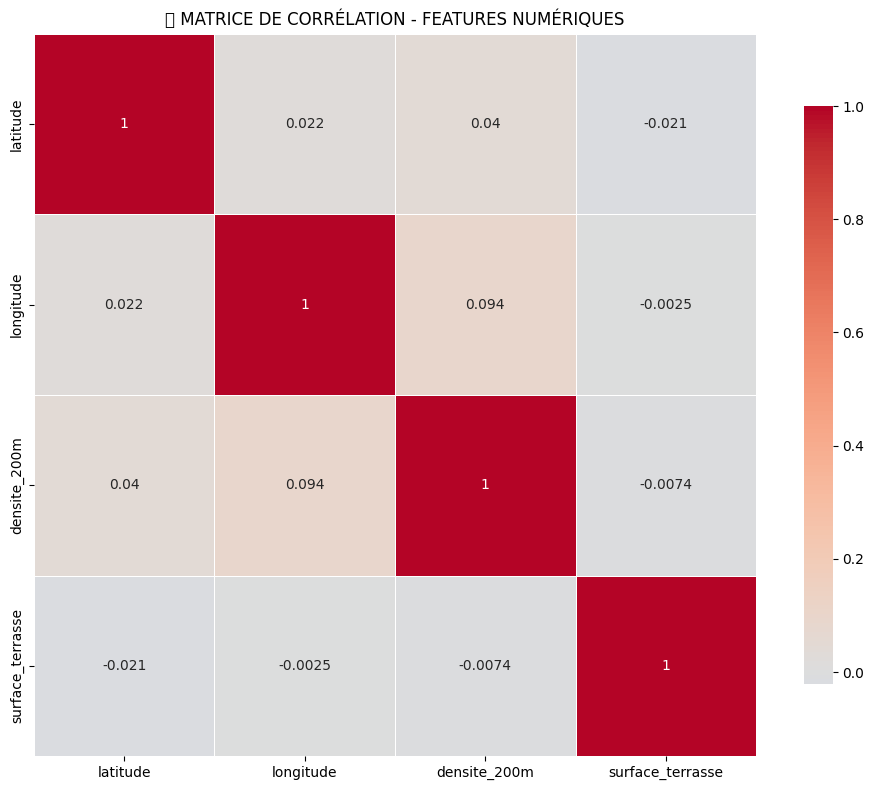

🎯 INTERPRÉTATION DES CORRÉLATIONS :
   • latitude        ↔ longitude       : 0.022 (FAIBLE)
   • latitude        ↔ densite_200m    : 0.040 (FAIBLE)
   • latitude        ↔ surface_terrasse : -0.021 (FAIBLE)
   • longitude       ↔ densite_200m    : 0.094 (FAIBLE)
   • longitude       ↔ surface_terrasse : -0.003 (FAIBLE)
   • densite_200m    ↔ surface_terrasse : -0.007 (FAIBLE)


In [42]:

print("🔥 ANALYSE DES RELATIONS ENTRE VARIABLES")

import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des features numériques pour la corrélation
numeric_features = ['latitude', 'longitude', 'densite_200m']
if 'surface_terrasse' in df_modeling.columns:
    numeric_features.append('surface_terrasse')

# Matrice de corrélation
plt.figure(figsize=(10, 8))
corr_matrix = df_modeling[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('🔥 MATRICE DE CORRÉLATION - FEATURES NUMÉRIQUES')
plt.tight_layout()
plt.show()

# Scatter plot matrix
fig_scatter = px.scatter_matrix(
    df_modeling[numeric_features],
    title='🔄 MATRICE DE SCATTER PLOTS - RELATIONS ENTRE VARIABLES',
    height=800
)

fig_scatter.show()

print("🎯 INTERPRÉTATION DES CORRÉLATIONS :")
for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        corr = corr_matrix.iloc[i, j]
        feat1, feat2 = corr_matrix.columns[i], corr_matrix.columns[j]
        strength = "FORTE" if abs(corr) > 0.7 else "MOYENNE" if abs(corr) > 0.3 else "FAIBLE"
        print(f"   • {feat1:15} ↔ {feat2:15} : {corr:.3f} ({strength})")


<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        h6 { color: lightpink; font-size: 15px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h6> 🎯 DASHBOARD SYNTHÈSE

 </h6>


In [43]:

print("🎯 DASHBOARD SYNTHÈSE - L'ARCHIPEL DES TERRASSES")

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Création d'un dashboard avec 4 graphiques
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('🏙️ Terrasses par Arrondissement', '🏷️ Types de Terrasses',
                    '📈 Distribution de Densité', '📍 Carte de Densité'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "histogram"}, {"type": "scattermapbox"}]]
)

# Graphique 1: Arrondissements
fig.add_trace(go.Bar(x=arrondissement_counts.index, y=arrondissement_counts.values,
                     name="Arrondissements"), row=1, col=1)

# Graphique 2: Typologies (top 10)
top_typologies = typologie_counts.head(10)
fig.add_trace(go.Bar(x=top_typologies.index, y=top_typologies.values,
                     name="Types"), row=1, col=2)

# Graphique 3: Densité
fig.add_trace(go.Histogram(x=df_modeling['densite_200m'], nbinsx=30,
                          name="Densité"), row=2, col=1)

# Graphique 4: Carte (simplifiée)
fig.add_trace(go.Scattermapbox(lat=df_modeling['latitude'], lon=df_modeling['longitude'],
                              mode='markers', marker=dict(size=3, opacity=0.6),
                              name="Terrasses"), row=2, col=2)

fig.update_layout(height=800, title_text="📊 DASHBOARD SYNTHÈSE - TERRASSES PARISIENNES")
fig.update_layout(mapbox_style="open-street-map", mapbox_zoom=11, 
                  mapbox_center={"lat": df_modeling['latitude'].mean(), 
                               "lon": df_modeling['longitude'].mean()})

fig.show()

print("\n" + "="*70)
print("🎯 SYNTHÈSE DES INSIGHTS POUR LE MODELING")
print("="*70)

print(f"📊 CARACTÉRISTIQUES DE VOTRE DATASET :")
print(f"   • {len(df_modeling):,} terrasses analysées")
print(f"   • Densité moyenne : {df_modeling['densite_200m'].mean():.1f} points/200m")
print(f"   • {df_modeling['arrondissement'].nunique()} arrondissements couverts")
print(f"   • {df_modeling['typologie'].nunique()} types de terrasses différents")

print(f"\n🎯 PRÉDICTIONS POUR DBSCAN :")
print(f"   • Zones denses détectables : OUI (max {df_modeling['densite_200m'].max()} points/200m)")
print(f"   • Clusters attendus : MULTIPLES (Paris = ville dense)")
print(f"   • Bruit attendu : FAIBLE (peu de points isolés)")

print(f"\n🚀 RECOMMANDATION :")
print(f"   • DBSCAN avec eps={0.02} et min_samples={5}")
print(f"   • Devrait révéler l'Archipel des Terrasses Parisiennes!")

🎯 DASHBOARD SYNTHÈSE - L'ARCHIPEL DES TERRASSES


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_2975/647431005.py:29: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/




🎯 SYNTHÈSE DES INSIGHTS POUR LE MODELING
📊 CARACTÉRISTIQUES DE VOTRE DATASET :
   • 4,988 terrasses analysées
   • Densité moyenne : 13.9 points/200m
   • 21 arrondissements couverts
   • 32 types de terrasses différents

🎯 PRÉDICTIONS POUR DBSCAN :
   • Zones denses détectables : OUI (max 69 points/200m)
   • Clusters attendus : MULTIPLES (Paris = ville dense)
   • Bruit attendu : FAIBLE (peu de points isolés)

🚀 RECOMMANDATION :
   • DBSCAN avec eps=0.02 et min_samples=5
   • Devrait révéler l'Archipel des Terrasses Parisiennes!


<!DOCTYPE html> <html> <head> <style> body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; } h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; } h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; } h3 { color: #00FFFF; font-size: 22px; margin-top: 20px; } ul { margin-left: 20px; } li { margin: 8px 0; } hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; } </style> </head> <body>

<h1>🚀 PHASE 4: MODELING DBSCAN </h1>

<p><strong>📌 Objectif :</strong></p>
<p>Cette phase consiste à appliquer l’algorithme <b>DBSCAN</b> pour identifier des groupes naturels (clusters) dans les données sans supervision. 
Il permet de détecter des structures cachées, même lorsque les formes sont complexes et les tailles variables.</p>

<h2>🧠 Étapes Clés</h2>
<ul>
  <li>⚙️ <b>Sélection des variables :</b> choisir les caractéristiques les plus pertinentes pour le clustering</li>
  <li>📏 <b>Normalisation :</b> appliquer StandardScaler ou MinMaxScaler pour homogénéiser les échelles</li>
  <li>🔍 <b>Choix des paramètres :</b> définir <code>eps</code> (distance maximale) et <code>min_samples</code> (nombre minimal de points)</li>
  <li>🧮 <b>Application du modèle :</b> ajuster DBSCAN et prédire les clusters</li>
  <li>📊 <b>Évaluation :</b> analyser les résultats via le nombre de clusters, les points bruités et la cohérence des regroupements</li>
</ul>

<p>Cette étape permet de découvrir la structure sous-jacente des données sans hypothèses préalables, offrant une vision claire des motifs cachés.</p>

</body>
</html>



<!DOCTYPE html>
<html>
<head>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background: #f5f5f5; color: #333; line-height: 1.6; }
        h1 { text-align: center; color: lightgreen; font-size: 36px; font-weight: bold; margin-bottom: 10px; }
        h2 { color: #EF806C; font-size: 28px; font-weight: bold; margin-top: 30px; }
        h3 { color: #00FFFF; font-size: 22px; font-weight: bold; margin-top: 20px;,  }
        ul { margin-left: 20px; }
        li { margin: 8px 0; }
        hr { height: 2px; border: none; background-color: lightgreen; margin: 20px 0; }
    </style>
</head>
<body>
<h3>  Application de DBSCAN avec vos paramètres optimaux

 </h3>


In [44]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd


In [45]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# 🔹 Features pour DBSCAN
X_dbscan = df_modeling[['longitude_scaled', 'latitude_scaled', 'densite_200m_scaled']].values

# 🔹 Grid search hyperparamètres
eps_values = [0.03, 0.035, 0.04, 0.045]
min_samples_values = [3, 4, 5]

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_dbscan)
        df_modeling['cluster_temp'] = clusters
        
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_bruit = (clusters == -1).sum()
        
        cluster_sizes = df_modeling[df_modeling['cluster_temp'] != -1]['cluster_temp'].value_counts()
        hotspots = cluster_sizes[cluster_sizes >= 5]
        coverage = hotspots.sum() / len(df_modeling) * 100
        
        # Silhouette uniquement si >= 2 clusters
        if n_clusters > 1:
            sil_score = silhouette_score(X_dbscan[clusters != -1], clusters[clusters != -1])
        else:
            sil_score = np.nan
        
        # Score combiné pour prioriser clusters exploitables et bonne silhouette
        combined_score = (coverage / 100) * sil_score if not np.isnan(sil_score) else 0
        
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_hotspots': len(hotspots),
            'coverage_%': coverage,
            'noise_%': n_bruit / len(df_modeling) * 100,
            'silhouette': sil_score,
            'combined_score': combined_score
        })

# 🔹 DataFrame résultats
df_results = pd.DataFrame(results)

# 🔹 Filtrage strict : moins de 85% de bruit, au moins 50 hotspots
df_results_filtered = df_results[(df_results['noise_%'] <= 85) & (df_results['n_hotspots'] >= 50)]

# 🔹 Sélection du meilleur paramètre selon score combiné
if not df_results_filtered.empty:
    best_idx = df_results_filtered['combined_score'].idxmax()
    best_params = df_results.loc[best_idx]
    print("🎯 Meilleurs paramètres stricts :", best_params.to_dict())
else:
    print("⚠️ Aucun paramètre strict n’a satisfait les critères. Ajuster eps/min_samples.")
    best_params = df_results.iloc[df_results['combined_score'].idxmax()]
    print("⚡ Paramètre “moins strict” utilisé :", best_params.to_dict())

# 🔹 Application DBSCAN final
dbscan_final = DBSCAN(eps=best_params['eps'], min_samples=int(best_params['min_samples']))
clusters_final = dbscan_final.fit_predict(X_dbscan)
df_modeling['cluster'] = clusters_final

# 🔹 Métriques finales
n_clusters_final = len(set(clusters_final)) - (1 if -1 in clusters_final else 0)
n_bruit_final = (clusters_final == -1).sum()
cluster_sizes_final = df_modeling[df_modeling['cluster'] != -1]['cluster'].value_counts()
hotspots_final = cluster_sizes_final[cluster_sizes_final >= 5]

print(f"\n📊 Métriques finales DBSCAN strictes :")
print(f"• Clusters totaux : {n_clusters_final}")
print(f"• Hotspots sérieux : {len(hotspots_final)}")
print(f"• Terrasses analysables : {hotspots_final.sum()}")
print(f"• Couverture réelle : {hotspots_final.sum()/len(df_modeling)*100:.1f}%")
print(f"• Bruit : {n_bruit_final/len(clusters_final)*100:.1f}%")

# 🔹 Top 10 hotspots
print("\n🏆 TOP 10 HOTSPOTS :")
for i, (cluster_id, taille) in enumerate(hotspots_final.head(10).items(), 1):
    print(f"  {i}. Cluster {cluster_id} : {taille} terrasses")


🎯 Meilleurs paramètres stricts : {'eps': 0.045, 'min_samples': 4.0, 'n_clusters': 203.0, 'n_hotspots': 89.0, 'coverage_%': 10.104250200481154, 'noise_%': 80.75380914194066, 'silhouette': 0.8992217574976138, 'combined_score': 0.09085961623472279}

📊 Métriques finales DBSCAN strictes :
• Clusters totaux : 203
• Hotspots sérieux : 89
• Terrasses analysables : 504
• Couverture réelle : 10.1%
• Bruit : 80.8%

🏆 TOP 10 HOTSPOTS :
  1. Cluster 43 : 9 terrasses
  2. Cluster 37 : 9 terrasses
  3. Cluster 128 : 8 terrasses
  4. Cluster 2 : 8 terrasses
  5. Cluster 49 : 8 terrasses
  6. Cluster 166 : 7 terrasses
  7. Cluster 25 : 7 terrasses
  8. Cluster 42 : 7 terrasses
  9. Cluster 8 : 7 terrasses
  10. Cluster 64 : 7 terrasses


In [46]:
import plotly.express as px

# 🔹 Dataset pour plot
plot_df = df_modeling.copy()
plot_df['cluster_str'] = plot_df['cluster'].astype(str)

# Mettre le bruit (-1) en "Bruit"
plot_df.loc[plot_df['cluster'] == -1, 'cluster_str'] = 'Bruit'

# 🔹 Graphique interactif
fig = px.scatter(
    plot_df,
    x='longitude',
    y='latitude',
    color='cluster_str',
    color_discrete_sequence=px.colors.qualitative.T10 + px.colors.qualitative.T10,
    hover_data=['densite_200m', 'categorie_commerciale'],
    title='DBSCAN Strict - Clustering des terrasses à Paris',
    width=1000,
    height=800
)

# 🔹 Mettre le bruit en gris
fig.for_each_trace(lambda t: t.update(marker=dict(color='lightgrey')) if t.name == 'Bruit' else ())

fig.update_layout(
    legend_title_text='Cluster',
    legend=dict(itemsizing='constant')
)

fig.show()


In [47]:
pip install hdbscan

Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn.cluster import OPTICS
import pandas as pd
import plotly.express as px
import numpy as np

# 🔹 Features for OPTICS (like DBSCAN)
X_optics = df_modeling[['longitude_scaled', 'latitude_scaled', 'densite_200m_scaled']].values

# 🔹 OPTICS clustering
optics_model = OPTICS(min_samples=4, xi=0.05, min_cluster_size=5)  # Adjust parameters if needed
clusters_optics = optics_model.fit_predict(X_optics)

df_modeling['cluster_optics'] = clusters_optics

# 🔹 Metrics
n_clusters = len(set(clusters_optics)) - (1 if -1 in clusters_optics else 0)
noise = (clusters_optics == -1).sum()
cluster_sizes = df_modeling[df_modeling['cluster_optics'] != -1]['cluster_optics'].value_counts()
hotspots = cluster_sizes[cluster_sizes >= 5]

print(f"\n📊 Metrics OPTICS:")
print(f"• Total clusters: {n_clusters}")
print(f"• Hotspots serious (≥5 terraces): {len(hotspots)}")
print(f"• Terraces analyzable: {hotspots.sum()}")
print(f"• Coverage: {hotspots.sum() / len(df_modeling) * 100:.1f}%")
print(f"• Noise: {noise / len(df_modeling) * 100:.1f}%")

# 🔹 Top 10 hotspots
print("\n🏆 TOP 10 HOTSPOTS (OPTICS):")
for i, (cluster_id, size) in enumerate(hotspots.head(10).items(), 1):
    print(f"  {i}. Cluster {cluster_id} : {size} terraces")

# 🔹 Plot with Plotly
fig = px.scatter_mapbox(
    df_modeling, 
    lat='latitude', lon='longitude', 
    color='cluster_optics',
    hover_name='typologie',
    hover_data=['densite_200m'],
    zoom=12,
    height=700,
    mapbox_style="carto-positron"
)
fig.update_layout(title="OPTICS Clustering - Terraces Paris")
fig.show()



📊 Metrics OPTICS:
• Total clusters: 404
• Hotspots serious (≥5 terraces): 404
• Terraces analyzable: 2934
• Coverage: 58.8%
• Noise: 41.2%

🏆 TOP 10 HOTSPOTS (OPTICS):
  1. Cluster 318 : 23 terraces
  2. Cluster 240 : 21 terraces
  3. Cluster 114 : 20 terraces
  4. Cluster 281 : 18 terraces
  5. Cluster 49 : 17 terraces
  6. Cluster 197 : 17 terraces
  7. Cluster 327 : 16 terraces
  8. Cluster 64 : 16 terraces
  9. Cluster 100 : 16 terraces
  10. Cluster 239 : 16 terraces


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_2975/2726491594.py:34: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import hdbscan
import plotly.express as px

# =========================================================
# 🔹 1. Préparation des données
# =========================================================
features = ['longitude', 'latitude', 'densite_200m', 'categorie_encoded']  # inclure typologie encodée
X_hdbscan = df_modeling[features].copy()

# Standardisation des features continues
scaler = StandardScaler()
X_hdbscan[['longitude', 'latitude', 'densite_200m']] = scaler.fit_transform(
    X_hdbscan[['longitude', 'latitude', 'densite_200m']]
)

X_hdbscan_values = X_hdbscan.values

# =========================================================
# 🔹 2. Création du modèle HDBSCAN
# =========================================================
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3, metric='euclidean')
clusters = clusterer.fit_predict(X_hdbscan_values)
df_modeling['cluster_hdbscan'] = clusters

# =========================================================
# 🔹 3. Métriques globales
# =========================================================
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = (clusters == -1).sum()
cluster_sizes = df_modeling[df_modeling['cluster_hdbscan'] != -1]['cluster_hdbscan'].value_counts()
hotspots = cluster_sizes[cluster_sizes >= 5]
coverage = hotspots.sum() / len(df_modeling) * 100
noise_pct = n_noise / len(df_modeling) * 100

print(f"\n📊 Métriques HDBSCAN :")
print(f"• Clusters totaux : {n_clusters}")
print(f"• Hotspots sérieux (≥5 terrasses) : {len(hotspots)}")
print(f"• Terrasses analysables : {hotspots.sum()}")
print(f"• Couverture réelle : {coverage:.1f}%")
print(f"• Bruit : {noise_pct:.1f}%")

# =========================================================
# 🔹 4. Top 10 hotspots (taille brute)
# =========================================================
print("\n🏆 TOP 10 HOTSPOTS (TAILLE) :")
for i, (cluster_id, taille) in enumerate(hotspots.head(10).items(), 1):
    print(f"  {i}. Cluster {cluster_id} : {taille} terrasses")

# Ajouter taille de cluster pour la dataviz
df_modeling['cluster_size'] = df_modeling['cluster_hdbscan'].map(
    cluster_sizes.to_dict()
).fillna(0)

# =========================================================
# 🔹 5. Score de qualité (persistence + taille)
# =========================================================
df_modeling['cluster_persistence'] = df_modeling['cluster_hdbscan'].map(
    {i: val for i, val in enumerate(clusterer.cluster_persistence_)}
).fillna(0)

# Calculer un score combiné
hotspots_scores = pd.DataFrame({
    'cluster_id': hotspots.index,
    'size': hotspots.values,
    'persistence': [clusterer.cluster_persistence_[i] for i in hotspots.index]
})
hotspots_scores['combined_score'] = hotspots_scores['size'] * hotspots_scores['persistence']
hotspots_scores = hotspots_scores.sort_values('combined_score', ascending=False)

print("\n🏆 TOP 10 HOTSPOTS (COMBINED SCORE) :")
for i, row in enumerate(hotspots_scores.head(10).itertuples(), 1):
    print(f"  {i}. Cluster {row.cluster_id} : {row.size} terrasses, "
          f"persistence={row.persistence:.3f}, score={row.combined_score:.3f}")

# =========================================================
# 🔹 6. Visualisation interactive Plotly
# =========================================================
df_plot = df_modeling[df_modeling['cluster_hdbscan'] != -1].copy()
df_plot['combined_score'] = df_plot['cluster_hdbscan'].map(
    hotspots_scores.set_index('cluster_id')['combined_score'].to_dict()
).fillna(0)

# 🔹 Visualisation interactive avec Plotly (nouvelle version)
fig = px.scatter_map(
    df_plot,
    lat="latitude",
    lon="longitude",
    color="cluster_hdbscan",
    size="combined_score",
    color_discrete_sequence=px.colors.qualitative.Dark24,
    hover_name="typologie",
    hover_data=["arrondissement", "densite_200m", "cluster_size", "combined_score"],
    zoom=12,
    height=700,
    title="Clusters HDBSCAN - Terrasses Paris (Weighted by Combined Score)"
)

fig.update_layout(map_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


/Users/zahra/Desktop/L'Archipel des Commerces Parisiens/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zahra/Desktop/L'Archipel des Commerces Parisiens/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




📊 Métriques HDBSCAN :
• Clusters totaux : 323
• Hotspots sérieux (≥5 terrasses) : 323
• Terrasses analysables : 3764
• Couverture réelle : 75.5%
• Bruit : 24.5%

🏆 TOP 10 HOTSPOTS (TAILLE) :
  1. Cluster 0 : 224 terrasses
  2. Cluster 199 : 70 terrasses
  3. Cluster 102 : 56 terrasses
  4. Cluster 150 : 48 terrasses
  5. Cluster 247 : 45 terrasses
  6. Cluster 9 : 45 terrasses
  7. Cluster 190 : 43 terrasses
  8. Cluster 25 : 38 terrasses
  9. Cluster 253 : 37 terrasses
  10. Cluster 300 : 33 terrasses

🏆 TOP 10 HOTSPOTS (COMBINED SCORE) :
  1. Cluster 282 : 12 terrasses, persistence=0.527, score=6.328
  2. Cluster 226 : 8 terrasses, persistence=0.159, score=1.271
  3. Cluster 224 : 10 terrasses, persistence=0.094, score=0.940
  4. Cluster 50 : 7 terrasses, persistence=0.133, score=0.930
  5. Cluster 157 : 5 terrasses, persistence=0.184, score=0.919
  6. Cluster 34 : 5 terrasses, persistence=0.169, score=0.844
  7. Cluster 185 : 10 terrasses, persistence=0.074, score=0.739
  8. Cluste

In [54]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

mask = df_modeling['cluster_hdbscan'] != -1
X_eval = X_hdbscan_values[mask]
labels_eval = df_modeling.loc[mask, 'cluster_hdbscan']

sil = silhouette_score(X_eval, labels_eval)
dbi = davies_bouldin_score(X_eval, labels_eval)
ch = calinski_harabasz_score(X_eval, labels_eval)

print(f"📏 Silhouette Score : {sil:.3f}")
print(f"📏 Davies-Bouldin Index : {dbi:.3f}")
print(f"📏 Calinski-Harabasz Score : {ch:.3f}")


📏 Silhouette Score : 0.402
📏 Davies-Bouldin Index : 0.747
📏 Calinski-Harabasz Score : 2001.898


In [58]:
# Ajouter combined_score à df_modeling
df_modeling['combined_score'] = df_modeling['cluster_hdbscan'].map(
    hotspots_scores.set_index('cluster_id')['combined_score'].to_dict()
).fillna(0)

keep = [
 'latitude','longitude','arrondissement','typologie','categorie_commerciale',
 'densite_200m','surface_terrasse','categorie_encoded','arrondissement_encoded',
 'cluster_hdbscan','cluster_size','combined_score','cluster_persistence'
]
df_final = df_modeling.copy()
# supprimer tout le reste
for col in df_final.columns:
    if col not in keep:
        df_final.drop(columns=[col], inplace=True)
# vérifier nulls
print(df_final[keep].isna().sum())
# sauvegarde
df_final.to_csv('../data/output/terrasses_paris_for_analysis.csv', index=False, encoding='utf-8')


latitude                   0
longitude                  0
arrondissement             0
typologie                  0
categorie_commerciale      0
densite_200m               0
surface_terrasse          35
categorie_encoded          0
arrondissement_encoded     0
cluster_hdbscan            0
cluster_size               0
combined_score             0
cluster_persistence        0
dtype: int64


In [61]:
df_final.isna().sum()

missing_percent = df_final.isna().sum() / len(df_final) * 100
print(missing_percent)

df_final[df_final['surface_terrasse'].isna()]




latitude                  0.000000
longitude                 0.000000
typologie                 0.000000
arrondissement            0.000000
densite_200m              0.000000
categorie_commerciale     0.000000
surface_terrasse          0.701684
categorie_encoded         0.000000
arrondissement_encoded    0.000000
cluster_hdbscan           0.000000
cluster_size              0.000000
cluster_persistence       0.000000
combined_score            0.000000
dtype: float64


,latitude,longitude,typologie,arrondissement,densite_200m,categorie_commerciale,surface_terrasse,categorie_encoded,arrondissement_encoded,cluster_hdbscan,cluster_size,cluster_persistence,combined_score
950,48.835389,2.281675,PARALLÈLE SUR FAÇADE,75015,5,PARALLÈLE SUR FAÇADE,NaN,15,14,14,9.0,0.001499,0.013487
994,48.867790,2.303220,ÉTALAGE SUR TROTTOIR,75008,23,ÉTALAGE SUR TROTTOIR,NaN,24,7,-1,0.0,0.000000,0.000000
1000,48.858293,2.388571,PERPENDICULAIRE SUR FAÇADE,75020,9,PERPENDICULAIRE SUR FAÇADE,NaN,17,19,-1,0.0,0.000000,0.000000
1006,48.872977,2.326396,PARALLÈLE SUR FAÇADE,75009,24,PARALLÈLE SUR FAÇADE,NaN,15,8,16,11.0,0.000381,0.004192
1048,48.866359,2.290887,PARALLÈLE SUR FAÇADE,75116,17,PARALLÈLE SUR FAÇADE,NaN,15,20,-1,0.0,0.000000,0.000000
1058,48.843850,2.283278,PARALLÈLE SUR LAMBREQUIN DE STORES,75015,10,PARALLÈLE SUR LAMBREQUIN DE STORES,NaN,16,14,-1,0.0,0.000000,0.000000
1059,48.863270,2.389416,PARALLÈLE SUR FAÇADE,75020,9,PARALLÈLE SUR FAÇADE,NaN,15,19,16,11.0,0.000381,0.004192
1234,48.852521,2.298510,PARALLÈLE SUR FAÇADE,75015,7,PARALLÈLE SUR FAÇADE,NaN,15,14,14,9.0,0.001499,0.013487
1391,48.889772,2.326526,PARALLÈLE SUR FAÇADE,75018,8,PARALLÈLE SUR FAÇADE,NaN,15,17,-1,0.0,0.000000,0.000000
1435,48.884150,2.349134,PARALLÈLE SUR FAÇADE,75010,12,PARALLÈLE SUR FAÇADE,NaN,15,9,16,11.0,0.000381,0.004192


In [63]:
df_final['surface_terrasse'] = df_final['surface_terrasse'].fillna(0)
print(df_final['surface_terrasse'].isna().sum())


0


In [64]:
import plotly.express as px

fig = px.scatter_map(
    df_final,
    lat="latitude",
    lon="longitude",
    color="cluster_hdbscan",
    size="combined_score",
    color_discrete_sequence=px.colors.qualitative.Dark24,
    hover_name="typologie",
    hover_data=["arrondissement", "densite_200m", "surface_terrasse", "cluster_size", "combined_score"],
    zoom=12,
    height=700,
    title="Carte des clusters HDBSCAN - Terrasses à Paris (Weighted by Combined Score)"
)

fig.update_layout(map_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


In [68]:
import plotly.graph_objects as go

top_hotspots = hotspots_scores.head(10)

fig = go.Figure()

fig.add_trace(go.Bar(
    y=[f"Cluster {i}" for i in top_hotspots['cluster_id']],
    x=top_hotspots['combined_score'],
    orientation='h',
    text=[f"Size: {s}, Persistence: {p:.3f}" for s, p in zip(top_hotspots['size'], top_hotspots['persistence'])],
    textposition='auto',
    marker_color='crimson'
))

fig.update_layout(
    title="🏆 Top 10 Hotspots de Terrasses à Paris (Score combiné)",
    xaxis_title="Score combiné",
    yaxis_title="Cluster",
    yaxis=dict(autorange="reversed"),  # inverse pour avoir le meilleur en haut
    height=500
)

fig.show()


In [66]:
fig = px.density_mapbox(
    df_final,
    lat='latitude',
    lon='longitude',
    z='densite_200m',  # ou 'surface_terrasse'
    radius=20,
    center=dict(lat=48.8566, lon=2.3522),
    zoom=12,
    mapbox_style="open-street-map",
    title="Carte de densité des terrasses à Paris"
)
fig.show()


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_2975/1226917263.py:1: DeprecationWarning:

*density_mapbox* is deprecated! Use *density_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [83]:
# Afficher toutes les typologies uniques
typologies_uniques = df_final['typologie'].unique()
print("Typologies uniques :")
print(typologies_uniques)

# Afficher le nombre d’occurrences pour chaque typologie
typologies_counts = df_final['typologie'].value_counts()
print("\nNombre de terrasses par typologie :")
print(typologies_counts)


Typologies uniques :
['CONTRE-TERRASSE OUVERTE' 'TERRASSE OUVERTE' 'ETALAGE' 'PLANCHER MOBILE'
 'COMMERCE ACCESSOIRE' 'TERRASSE FERMÉE' 'CONTRE-ÉTALAGE' 'CONTRE ETALAGE'
 'TERRASSE FERMEE'
 'CONTRE TERRASSE ESTIVALE SUR TROTTOIR FACE À LA DEVANTURE'
 'TERRASSE ESTIVALE SUR TROTTOIR FACE À LA DEVANTURE'
 'CONTRE TERRASSE ESTIVALE SUR STATIONNEMENT'
 'TERRASSES OUVERTES SUR TROTTOIR' 'TERRASSES FERMÉES SUR TROTTOIR'
 'CONTRE TERRASSE ESTIVALE SUR TROTTOIR DÉSAXÉE PAR RAPPORT À LA DEVANTURE'
 'ÉTALAGE SUR TROTTOIR' 'CONTRE-TERRASSE PERMANENTE SUR STATIONNEMENT'
 'CONTRE TERRASSE ESTIVALE SUR PLACES ET TERRE-PLEIN'
 'CONTRE-TERRASSE ESTIVALE SUR VOIE PIÉTONNE'
 'TERRASSE ESTIVALE SUR TROTTOIR DÉSAXÉE PAR RAPPORT À LA DEVANTURE'
 'TERRASSES OUVERTES SUR VOIE PIÉTONNE' 'ÉTALAGE SUR VOIE PIÉTONNE'
 'PARALLÈLE SUR FAÇADE' 'CONTRE TERRASSE SUR TROTTOIR'
 'CONTRE ÉTALAGE SUR TROTTOIR' 'PERPENDICULAIRE SUR FAÇADE'
 'PARALLÈLE SUR LAMBREQUIN DE STORES' 'CONTRE TERRASSE SUR VOIE PIÉTONNE'
 'CONTRE-

In [101]:
counts = df_final['typologie'].value_counts()
rare_types = counts[counts < 10].index
df_final['typologie_grouped'] = df_final['typologie'].replace(rare_types, 'AUTRES')
import plotly.express as px

fig = px.box(
    df_final,
    x="typologie_grouped",
    y="surface_terrasse",
    color="typologie_grouped",
    points=False,  # hide points for clarity
    title="Distribution des surfaces de terrasses par typologie"
)

# Hide x-axis labels since legend already shows typologies
fig.update_xaxes(showticklabels=False)

fig.update_layout(
    yaxis_title="Surface terrasse (m²)",
    xaxis_title="",  # optional: remove x-axis title
    yaxis=dict(range=[0, 200]),  # optional: limit Y for better visualization
    height=800, 
    width=1700
)

fig.show()
